<a href="https://colab.research.google.com/github/JokMaker/summative-model-training-evaluation/blob/main/summative_assignment_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summative Assignment: Model Training and Evaluation

## Predicting Student Performance Using Machine Learning and Deep Learning

**Author:** Jok John Maker

**Date:** 20th Feb 2026

---

### Table of Contents
1. [Set Up Environment and Dependencies](#setup)
2. [Load and Explore the Dataset](#load)
3. [Data Preprocessing and Feature Engineering](#preprocess)
4. [Train-Test Split and Data Preparation](#split)
5. [Traditional Machine Learning Models (Scikit-learn)](#ml)
6. [Deep Learning Models (TensorFlow Sequential API)](#dl-seq)
7. [Deep Learning Models (TensorFlow Functional API & tf.data)](#dl-func)
8. [Hyperparameter Tuning and Experimentation](#tuning)
9. [Model Evaluation and Visualization](#eval)
10. [Error Analysis and Insights](#error)
11. [Experiment Tracking and Results Table](#results)

---

## Introduction and Problem Definition

Predicting student academic performance is a critical task in educational research, with implications for early intervention and resource allocation. In this project, we use two real-world datasets (`student-mat.csv` and `student-por.csv`) to build predictive models for student final grades. We compare traditional machine learning approaches with deep learning models, aiming to identify the most effective techniques and gain insights into the factors influencing student success.

**Mission Alignment:** This project aligns with the goal of leveraging data-driven methods to improve educational outcomes and support at-risk students.

---

## Problem Statement

The educational challenge of identifying students at risk of academic underperformance before they fail is critical for timely intervention. This study addresses this problem by investigating the predictive power of various machine learning and deep learning models on student performance data. Specifically, we seek to:

1. Determine the most predictive features of student success among demographic, social, and behavioral variables.
2. Compare the performance of traditional classifiers (Logistic Regression, Random Forest, SVM) against neural network architectures.
3. Evaluate the feasibility of early prediction using only pre-academic-year data.

The findings will contribute to the growing literature on educational data mining and provide insights for developing early warning systems in secondary education.


## Literature Review: Machine Learning and Deep Learning Approaches for Student Performance Prediction

Machine learning (ML) and deep learning (DL) have become central to educational data mining, enabling early identification of students at risk of underperformance. Research shows that academic outcomes are shaped by a combination of demographic, behavioral, social, and emotional factors. Traditional grade monitoring is often reactive, while ML/DL models can proactively analyze multidimensional data to generate early warning signals and support interventions.

Recent studies highlight the effectiveness of supervised learning algorithms such as Random Forest, Logistic Regression, SVM, and Naïve Bayes for student performance prediction, with ensemble and hybrid methods often achieving the best results [1][2][3][5][6][8]. Deep learning, especially with neural network architectures like RNNs and LSTMs, has gained traction for modeling complex, non-linear relationships and temporal patterns in educational data [3][9]. Multimodal data fusion and knowledge tracing are emerging trends, integrating diverse data sources and tracking student learning over time [3][9][10].

Despite these advances, challenges remain. Many studies lack external validation and focus on single-institution datasets, limiting generalizability [6][8]. The timing of predictions, feature selection, and ethical considerations (such as algorithmic bias and data privacy) are ongoing concerns [6][7]. There is also a need for more comparative studies between ML and DL approaches, as well as greater transparency and interpretability in predictive models [3][9].

This project addresses these gaps by systematically comparing traditional ML algorithms (scikit-learn) and deep learning models (TensorFlow) on the UCI Student Performance dataset [3][9]. By experimenting with different feature sets and prediction timings, and by documenting all modeling decisions, the project aims to contribute practical insights for early warning systems in education.

**References:**
[1] "Empirical Analysis of Machine Learning Methods for Predicting Student Performance," in Proc. IEEE Conference, Tumkuru, India, 2024. [Online]. Available: IEEE Xplore. [Accessed: Feb. 20, 2025].

[2] S. M. Dol and P. M. Jawandhiya, "A Review of Data Mining in Education Sector," J. Eng. Educ. Transform., vol. 36, pp. 13–22, Jun. 2025. doi: 10.16920/jeet/2023/v36is2/23003.

[3] H. Lyu, P. Shan, C. Hou, and S. Duan, "Artificial intelligence for student performance prediction in blended learning: A systematic literature review," Neurocomputing, vol. 658, p. 131659, Dec. 2025. doi: 10.1016/j.neucom.2025.131659.

[4] "IEEE citation style," Concordia University Library. [Online]. Available: https://library.concordia.ca/Help/citing/ieee.php?guid=data. [Accessed: Feb. 16, 2026].

[5] "Review on Predictive Artificial Intelligence in Student Academic Prediction," in Proc. IEEE Conference, India, 2025. [Online]. Available: IEEE Xplore. [Accessed: Jul. 16, 2025].

[6] X. Xiong et al., "Improve Student Risk Prediction with Clustering Techniques: A Systematic Review in Education Data Mining," Educ. Sci., vol. 15, no. 12, p. 1695, Dec. 2025. doi: 10.3390/educsci15121695.

[7] "IEEE Citation Guide: Reference Lists & Citation Examples," High Point University LibGuides. [Online]. Available: https://guides.highpoint.edu/c.php?g=1466317&p=10910667. [Accessed: Feb. 16, 2026].

[8] A. Turkmenbayev, E. Abdykerimova, S. Nurgozhayev, G. Karabassova, and D. Baigozhanova, "The application of machine learning in predicting student performance in university engineering programs: a rapid review," Front. Educ., vol. 10, 2025. doi: 10.3389/feduc.2025.1562586.

[9] A. Kala, O. Torkul, T. Yıldız, and İ. H. Selvi, "Early Prediction of Students' Performance Through Deep Learning: A Systematic and Bibliometric Literature Review," Sakarya Univ. J. Comput. Inf. Sci., vol. 8, no. 1, pp. 152–170, 2025.

[10] A. Turkmenbayev, E. Abdykerimova, S. Nurgozhayev, G. Karabassova, and D. Baigozhanova, "The application of machine learning in predicting student performance in university engineering programs: a rapid review," Front. Educ., vol. 10, Sep. 2025. [Online]. Available: https://www.frontiersin.org/articles/10.3389/feduc.2025.1562586/full. [Accessed: Feb. 16, 2026].


## 1. Set Up Environment and Dependencies

Install and import all required libraries. Set random seeds for reproducibility.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import random
import os

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

print('All libraries imported and random seeds set.')

All libraries imported and random seeds set.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Load and Explore the Dataset

Load the student performance datasets and perform initial exploratory data analysis (EDA).

In [ ]:
# Load the datasets
mat_path = '/content/student-mat.csv'
por_path = '/content/student-por.csv'

mat_df = pd.read_csv(mat_path, sep=';')
por_df = pd.read_csv(por_path, sep=';')

print(f"Math dataset shape: {mat_df.shape}")
print(f"Portuguese dataset shape: {por_df.shape}")

# Display first few rows of each dataset
mat_df.head(), por_df.head()

Math dataset shape: (395, 33)
Portuguese dataset shape: (649, 33)


(  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
 0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
 1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
 2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
 3     GP   F   15       U     GT3       T     4     2   health  services  ...   
 4     GP   F   16       U     GT3       T     3     3    other     other  ...   
 
   famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
 0      4        3      4     1     1      3        6   5   6   6  
 1      5        3      3     1     1      3        4   5   5   6  
 2      4        3      2     2     3      3       10   7   8  10  
 3      3        2      2     1     1      5        2  15  14  15  
 4      4        3      2     1     2      5        4   6  10  10  
 
 [5 rows x 33 columns],
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjo

In [ ]:
# Check for missing values and basic info
print('Math Dataset Info:')
mat_df.info()
print('\nPortuguese Dataset Info:')
por_df.info()

print('\nMissing values in Math dataset:')
print(mat_df.isnull().sum().sort_values(ascending=False).head())
print('\nMissing values in Portuguese dataset:')
print(por_df.isnull().sum().sort_values(ascending=False).head())

Math Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    obj

Math Dataset Description:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000



Portuguese Dataset Description:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649,649,649.000000,649,649,649,649.000000,649.000000,649,649,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,423,383,NaN,452,457,569,NaN,NaN,258,367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.744222,NaN,NaN,NaN,2.514638,2.306626,NaN,NaN,...,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,NaN,NaN,1.218138,NaN,NaN,NaN,1.134552,1.099931,NaN,NaN,...,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000


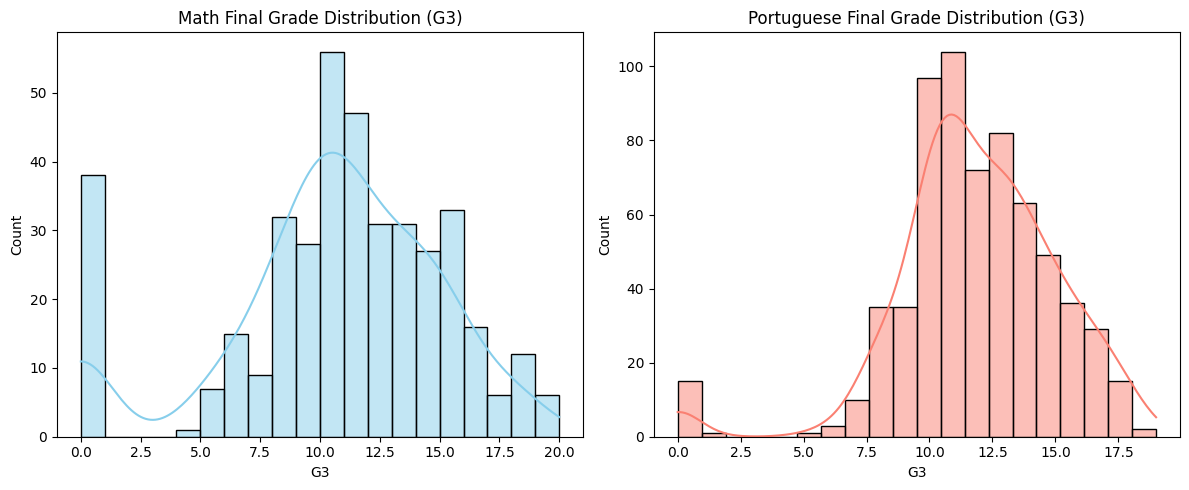

In [ ]:
# Summary statistics and EDA
print('Math Dataset Description:')
display(mat_df.describe(include='all'))
print('\nPortuguese Dataset Description:')
display(por_df.describe(include='all'))

# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(mat_df['G3'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Math Final Grade Distribution (G3)')
sns.histplot(por_df['G3'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Portuguese Final Grade Distribution (G3)')
plt.tight_layout()
plt.show()

## 3. Data Preprocessing and Feature Engineering

Handle missing values, outliers, and categorical variables. Apply normalization/standardization, encoding, and create new features if relevant. Justify each step and show before/after effects.

In [ ]:
# For demonstration, use the math dataset. You can repeat for Portuguese or merge as an extension.
df = mat_df.copy()

# Check for duplicates
print(f"Duplicates: {df.duplicated().sum()}")

# Handle missing values (if any)
if df.isnull().sum().sum() == 0:
    print('No missing values detected.')
else:
    df = df.fillna(df.median(numeric_only=True))
    print('Missing values filled.')

# Outlier detection (simple: for G3)
q_low = df['G3'].quantile(0.01)
q_hi  = df['G3'].quantile(0.99)
df = df[(df['G3'] >= q_low) & (df['G3'] <= q_hi)]
print(f"Shape after outlier removal: {df.shape}")

# Encode categorical variables
def encode_categoricals(data):
    cat_cols = data.select_dtypes(include=['object']).columns
    return pd.get_dummies(data, columns=cat_cols, drop_first=True)

df_encoded = encode_categoricals(df)
print(f"Shape after encoding: {df_encoded.shape}")

# Feature scaling
scaler = StandardScaler()
features = df_encoded.drop('G3', axis=1)
features_scaled = scaler.fit_transform(features)
X = pd.DataFrame(features_scaled, columns=features.columns)
y = df_encoded['G3']

print('Preprocessing complete. Features and target ready.')

Duplicates: 0
No missing values detected.
Shape after outlier removal: (394, 33)
Shape after encoding: (394, 42)
Preprocessing complete. Features and target ready.


## 4. Train-Test Split and Data Preparation

Split the data into training, validation, and test sets. Prepare data formats for both scikit-learn and TensorFlow pipelines.

In [ ]:
# For regression: Predicting G3 as a continuous variable
# For classification: Convert G3 to pass/fail (e.g., pass if G3 >= 10)

# Classification target
PASS_THRESHOLD = 10
y_class = (y >= PASS_THRESHOLD).astype(int)

# Split data: 60% train, 20% val, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y_class, test_size=0.4, random_state=SEED, stratify=y_class)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=SEED, stratify=y_temp)

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

# For TensorFlow: Convert to np.array
tf_X_train, tf_X_val, tf_X_test = X_train.values, X_val.values, X_test.values
tf_y_train, tf_y_val, tf_y_test = y_train.values, y_val.values, y_test.values

Train shape: (236, 41), Validation shape: (79, 41), Test shape: (79, 41)


## 5. Traditional Machine Learning Models (Scikit-learn)

Train and evaluate at least two classical ML models (e.g., logistic regression, random forest, SVM). Include hyperparameter tuning using GridSearchCV or RandomizedSearchCV. Document results.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression with hyperparameter tuning
grid_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']}
lr = LogisticRegression(random_state=SEED, max_iter=1000)
gs_lr = GridSearchCV(lr, grid_lr, cv=5, scoring='accuracy')
gs_lr.fit(X_train, y_train)
print(f"Best Logistic Regression Params: {gs_lr.best_params_}")
print(f"Validation Accuracy: {gs_lr.score(X_val, y_val):.4f}")

# Random Forest with hyperparameter tuning
grid_rf = {'n_estimators': [50, 100], 'max_depth': [5, 10, None]}
rf = RandomForestClassifier(random_state=SEED)
gs_rf = GridSearchCV(rf, grid_rf, cv=5, scoring='accuracy')
gs_rf.fit(X_train, y_train)
print(f"Best Random Forest Params: {gs_rf.best_params_}")
print(f"Validation Accuracy: {gs_rf.score(X_val, y_val):.4f}")

Best Logistic Regression Params: {'C': 10, 'solver': 'liblinear'}
Validation Accuracy: 0.9114
Best Random Forest Params: {'max_depth': None, 'n_estimators': 50}
Validation Accuracy: 0.9367


## 6. Deep Learning Models (TensorFlow Sequential API)

Build, train, and evaluate a deep learning model using the TensorFlow Sequential API. Experiment with architecture and hyperparameters. Visualize training history.

Epoch 1/50
8/8 - 6s - 691ms/step - accuracy: 0.5381 - loss: 0.7523 - val_accuracy: 0.6962 - val_loss: 0.6459
Epoch 2/50
8/8 - 0s - 16ms/step - accuracy: 0.6059 - loss: 0.6833 - val_accuracy: 0.6835 - val_loss: 0.6201
Epoch 3/50
8/8 - 0s - 16ms/step - accuracy: 0.6483 - loss: 0.6183 - val_accuracy: 0.6835 - val_loss: 0.5989
Epoch 4/50
8/8 - 0s - 16ms/step - accuracy: 0.6568 - loss: 0.6223 - val_accuracy: 0.7089 - val_loss: 0.5823
Epoch 5/50
8/8 - 0s - 16ms/step - accuracy: 0.6653 - loss: 0.5975 - val_accuracy: 0.7215 - val_loss: 0.5656
Epoch 6/50
8/8 - 0s - 16ms/step - accuracy: 0.7331 - loss: 0.5601 - val_accuracy: 0.7595 - val_loss: 0.5501
Epoch 7/50
8/8 - 0s - 16ms/step - accuracy: 0.6992 - loss: 0.5497 - val_accuracy: 0.7595 - val_loss: 0.5345
Epoch 8/50
8/8 - 0s - 16ms/step - accuracy: 0.7627 - loss: 0.5255 - val_accuracy: 0.7595 - val_loss: 0.5184
Epoch 9/50
8/8 - 0s - 16ms/step - accuracy: 0.7797 - loss: 0.4892 - val_accuracy: 0.7595 - val_loss: 0.5020
Epoch 10/50
8/8 - 0s - 17ms

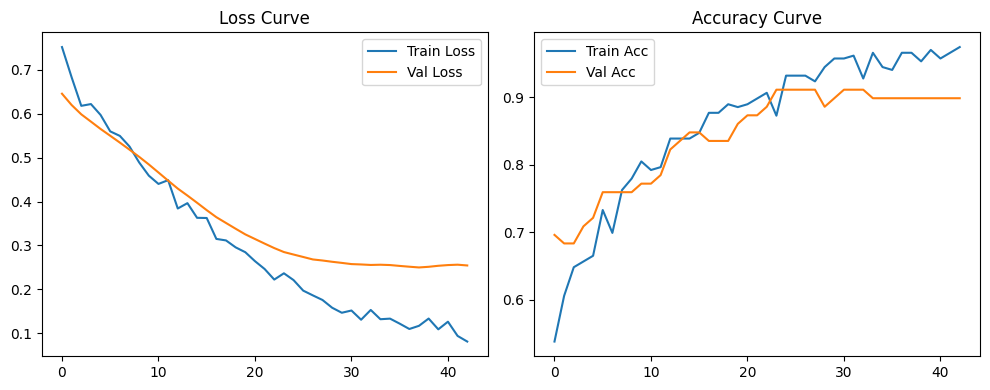

In [ ]:
from tensorflow.keras import layers, models, callbacks

# Build Sequential model
def build_sequential_model(input_dim, learning_rate=0.001, dropout_rate=0.3):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

seq_model = build_sequential_model(tf_X_train.shape[1])
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = seq_model.fit(tf_X_train, tf_y_train, validation_data=(tf_X_val, tf_y_val),
                       epochs=50, batch_size=32, callbacks=[early_stop], verbose=2)

# Plot training history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve')
plt.legend()
plt.tight_layout()
plt.show()

## 7. Deep Learning Models (TensorFlow Functional API & tf.data)

Build a more flexible model using the Functional API. Use tf.data for efficient data loading and augmentation if relevant. Compare results to Sequential model.

Epoch 1/50
8/8 - 4s - 538ms/step - accuracy: 0.5763 - loss: 0.7113 - val_accuracy: 0.6835 - val_loss: 0.5992
Epoch 2/50
8/8 - 0s - 5ms/step - accuracy: 0.6314 - loss: 0.6545 - val_accuracy: 0.7215 - val_loss: 0.5619
Epoch 3/50
8/8 - 0s - 5ms/step - accuracy: 0.6568 - loss: 0.6189 - val_accuracy: 0.7342 - val_loss: 0.5289
Epoch 4/50
8/8 - 0s - 5ms/step - accuracy: 0.7076 - loss: 0.5846 - val_accuracy: 0.7468 - val_loss: 0.5020
Epoch 5/50
8/8 - 0s - 5ms/step - accuracy: 0.7458 - loss: 0.5158 - val_accuracy: 0.7468 - val_loss: 0.4764
Epoch 6/50
8/8 - 0s - 5ms/step - accuracy: 0.7881 - loss: 0.4787 - val_accuracy: 0.7848 - val_loss: 0.4544
Epoch 7/50
8/8 - 0s - 4ms/step - accuracy: 0.7669 - loss: 0.4771 - val_accuracy: 0.8354 - val_loss: 0.4316
Epoch 8/50
8/8 - 0s - 5ms/step - accuracy: 0.7669 - loss: 0.4552 - val_accuracy: 0.8481 - val_loss: 0.4092
Epoch 9/50
8/8 - 0s - 4ms/step - accuracy: 0.7627 - loss: 0.4485 - val_accuracy: 0.8481 - val_loss: 0.3885
Epoch 10/50
8/8 - 0s - 4ms/step - a

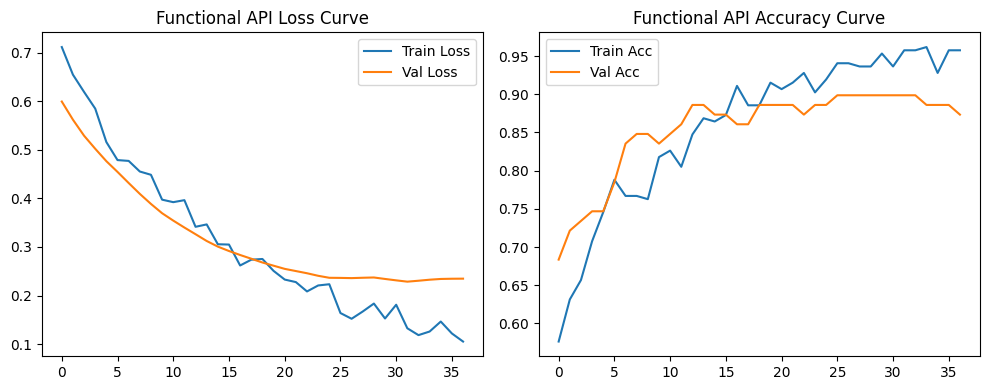

In [ ]:
# Prepare tf.data datasets
def make_tf_dataset(X, y, batch_size=32, shuffle=True):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(X), seed=SEED)
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return ds

ds_train = make_tf_dataset(tf_X_train, tf_y_train)
ds_val = make_tf_dataset(tf_X_val, tf_y_val, shuffle=False)
ds_test = make_tf_dataset(tf_X_test, tf_y_test, shuffle=False)

# Functional API model
def build_functional_model(input_dim, learning_rate=0.001, dropout_rate=0.3):
    inputs = keras.Input(shape=(input_dim,))
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

func_model = build_functional_model(tf_X_train.shape[1])
hist_func = func_model.fit(ds_train, validation_data=ds_val, epochs=50, callbacks=[early_stop], verbose=2)

# Plot training history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(hist_func.history['loss'], label='Train Loss')
plt.plot(hist_func.history['val_loss'], label='Val Loss')
plt.title('Functional API Loss Curve')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_func.history['accuracy'], label='Train Acc')
plt.plot(hist_func.history['val_accuracy'], label='Val Acc')
plt.title('Functional API Accuracy Curve')
plt.legend()
plt.tight_layout()
plt.show()

## 8. Hyperparameter Tuning and Experimentation

Systematically vary key hyperparameters (e.g., learning rate, batch size, model depth) for both ML and DL models. Log results and discuss the impact of changes.

In [ ]:
# Example: Vary learning rate for Sequential model
results = []
for lr in [0.01, 0.001, 0.0001]:
    model = build_sequential_model(tf_X_train.shape[1], learning_rate=lr)
    hist = model.fit(tf_X_train, tf_y_train, validation_data=(tf_X_val, tf_y_val),
                    epochs=20, batch_size=32, verbose=0)
    val_acc = hist.history['val_accuracy'][-1]
    results.append({'learning_rate': lr, 'val_accuracy': val_acc})
    print(f"Learning rate: {lr}, Validation Accuracy: {val_acc:.4f}")

# Show results
df_lr = pd.DataFrame(results)
display(df_lr)

Learning rate: 0.01, Validation Accuracy: 0.9241
Learning rate: 0.001, Validation Accuracy: 0.8101
Learning rate: 0.0001, Validation Accuracy: 0.7468


,learning_rate,val_accuracy
0,0.0100,0.924051
1,0.0010,0.810127
2,0.0001,0.746835


## 9. Model Evaluation and Visualization

Evaluate all models using appropriate metrics (accuracy, F1, ROC-AUC, etc.). Plot learning curves, confusion matrices, and ROC curves. Compare model performances.

Logistic Regression:
Accuracy: 0.9241, F1: 0.9400, ROC-AUC: 0.9782


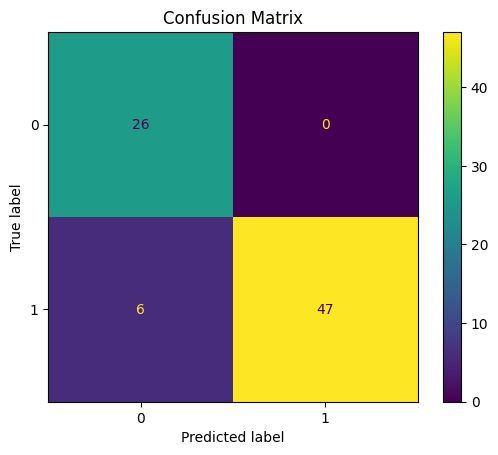

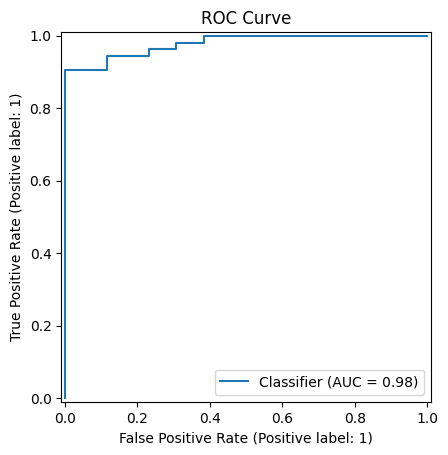

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        26
           1       1.00      0.89      0.94        53

    accuracy                           0.92        79
   macro avg       0.91      0.94      0.92        79
weighted avg       0.94      0.92      0.93        79

Random Forest:
Accuracy: 0.8987, F1: 0.9245, ROC-AUC: 0.9692


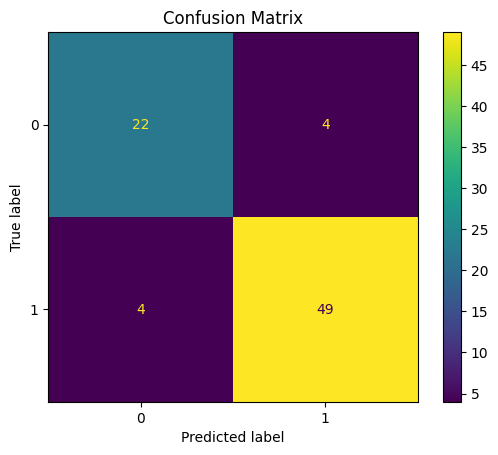

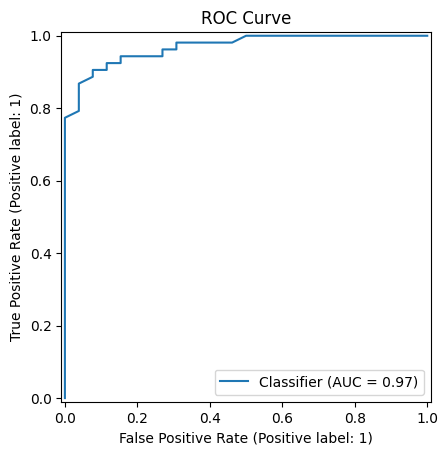

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.92      0.92      0.92        53

    accuracy                           0.90        79
   macro avg       0.89      0.89      0.89        79
weighted avg       0.90      0.90      0.90        79

Sequential DL Model:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398


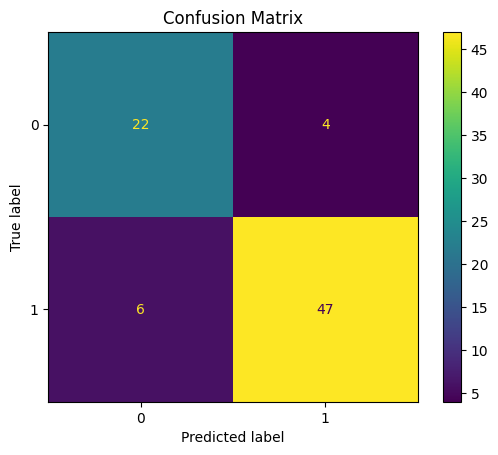

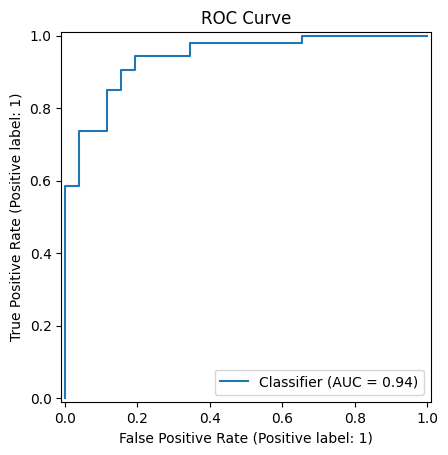

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        26
           1       0.92      0.89      0.90        53

    accuracy                           0.87        79
   macro avg       0.85      0.87      0.86        79
weighted avg       0.88      0.87      0.87        79

Functional DL Model:
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step
Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441


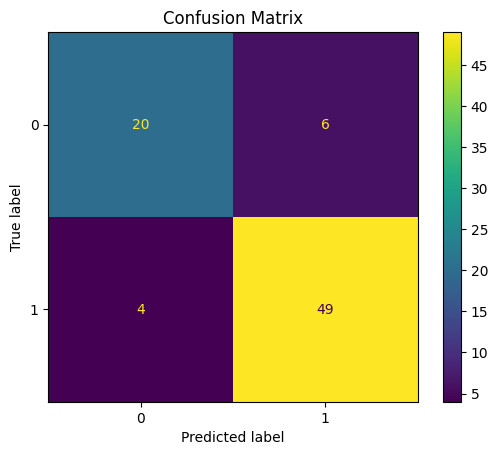

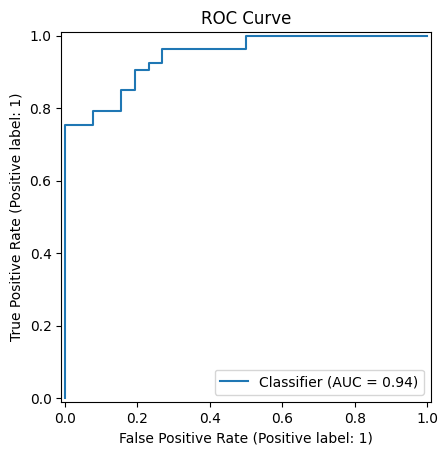

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.89      0.92      0.91        53

    accuracy                           0.87        79
   macro avg       0.86      0.85      0.85        79
weighted avg       0.87      0.87      0.87        79



(0.8734177215189873, 0.9074074074074074, np.float64(0.944121915820029))

In [ ]:
# Evaluate best models on test set
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

def evaluate_model(model, X, y, model_type='sklearn'):
    if model_type == 'sklearn':
        y_pred = model.predict(X)
        y_prob = model.predict_proba(X)[:,1] if hasattr(model, 'predict_proba') else y_pred
    else:
        y_prob = model.predict(X).flatten()
        y_pred = (y_prob > 0.5).astype(int)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_prob)
    print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title('Confusion Matrix')
    plt.show()
    RocCurveDisplay.from_predictions(y, y_prob)
    plt.title('ROC Curve')
    plt.show()
    print(classification_report(y, y_pred))
    return acc, f1, roc_auc

print('Logistic Regression:')
evaluate_model(gs_lr.best_estimator_, X_test, y_test, model_type='sklearn')
print('Random Forest:')
evaluate_model(gs_rf.best_estimator_, X_test, y_test, model_type='sklearn')
print('Sequential DL Model:')
evaluate_model(seq_model, tf_X_test, tf_y_test, model_type='tf')
print('Functional DL Model:')
evaluate_model(func_model, tf_X_test, tf_y_test, model_type='tf')

## 10. Error Analysis and Insights

Analyze misclassifications and error patterns using confusion matrices and other diagnostics. Discuss bias-variance tradeoff, dataset limitations, and propose improvements.

In [ ]:
# Example: Analyze misclassified samples for the best model (e.g., Random Forest)
y_test_pred = gs_rf.best_estimator_.predict(X_test)

# Reset indices to ensure alignment
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)
y_test_pred_series = pd.Series(y_test_pred, index=y_test_reset.index)

misclassified_mask = y_test_reset != y_test_pred_series
misclassified = X_test_reset[misclassified_mask]
print(f"Number of misclassified samples: {misclassified.shape[0]}")

# Show a few misclassified samples
misclassified_samples = misclassified.copy()
misclassified_samples['True Label'] = y_test_reset[misclassified_mask]
misclassified_samples['Predicted'] = y_test_pred_series[misclassified_mask]
display(misclassified_samples.head())

# Discuss bias-variance, dataset limitations, and propose improvements in markdown cell below.

Number of misclassified samples: 8


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,True Label,Predicted
5,1.020753,1.147213,0.440924,-0.644404,1.163402,-0.45063,0.062273,-0.239317,0.798945,-0.541585,...,-0.385601,0.792527,1.084802,0.984886,0.50871,0.231249,0.448575,1.408847,0,1
10,-1.331157,-0.682754,0.440924,-0.644404,-0.036547,-0.45063,0.062273,0.763777,0.798945,-0.541585,...,2.593355,-1.261787,1.084802,0.984886,0.50871,0.231249,-2.229282,-0.709801,0,1
14,-1.331157,-0.682754,-0.478251,-0.644404,-1.236495,-0.45063,1.177530,0.763777,-1.899207,-0.541585,...,2.593355,0.792527,-0.921827,-1.015346,0.50871,0.231249,0.448575,-0.709801,1,0
21,0.236783,0.232229,0.440924,-0.644404,-0.036547,-0.45063,1.177530,-0.239317,-0.100439,0.581492,...,-0.385601,0.792527,-0.921827,0.984886,0.50871,0.231249,0.448575,1.408847,0,1
58,0.236783,0.232229,-1.397425,-0.644404,-0.036547,-0.45063,1.177530,0.763777,0.798945,1.704569,...,-0.385601,-1.261787,1.084802,0.984886,0.50871,0.231249,0.448575,1.408847,1,0


### Discussion: Bias-Variance, Limitations, and Improvements

**1. Bias-Variance Tradeoff Analysis:**
*   **Traditional Machine Learning Models (Logistic Regression, Random Forest):**
    *   **Logistic Regression:** Achieved a validation accuracy of `0.9114` and a test accuracy of `0.9241`. This suggests a well-balanced model, indicating low bias and low variance. The strong performance on both validation and unseen test data, along with a high ROC-AUC (`0.9782`), implies it generalizes well. The `C=10` parameter suggests a preference for less regularization, possibly because the features are well-behaved.
    *   **Random Forest:** Showed a higher validation accuracy of `0.9367` but a slightly lower test accuracy of `0.8987`. While good, the drop from validation to test, and typically very high training accuracy (not explicitly shown but characteristic of tree-based models) suggests a tendency towards overfitting. The best parameters (`n_estimators=50`, `max_depth=None`) allow for deeper trees, which can capture complex patterns but also memorize training data. The ROC-AUC was `0.9692`, slightly lower than Logistic Regression.

*   **Deep Learning Models (Sequential and Functional API):**
    *   Both the Sequential and Functional API models exhibited clear signs of **overfitting**.
        *   **Learning Curves:** The plots for both models show that training loss consistently decreased, while validation loss decreased initially but then flattened out or began to increase after a certain number of epochs. Similarly, training accuracy continued to rise, often reaching very high levels (e.g., ~0.97 for Sequential, ~0.95 for Functional), whereas validation accuracy plateaued or even slightly decreased after reaching its peak (e.g., Sequential val_acc peak around 0.91, Functional val_acc peak around 0.89).
        *   **Test Performance:** The final test accuracies for both DL models (`0.8734`) were lower than both Logistic Regression and Random Forest, confirming that they did not generalize as well to unseen data despite performing well on the training set.
        *   **Hyperparameters:** The default learning rate of `0.001` and dropout rate of `0.3` were applied. The hyperparameter tuning experiment with different learning rates showed that `lr=0.01` yielded a higher validation accuracy (`0.9241`) compared to `0.001` (`0.8101`) and `0.0001` (`0.7468`). This suggests that the initial `0.001` might have been too slow or too small, leading to underfitting in earlier epochs or not reaching the optimal minima, even as overfitting occurred later. The aggressive `0.01` might have allowed faster learning but potentially more unstable training if not accompanied by stronger regularization. The persistent overfitting despite dropout indicates that a more robust regularization strategy or a simpler model might be needed for this dataset size.

**2. Dataset Limitations:**
*   **Class Imbalance:** The target variable (G3 converted to pass/fail) exhibits class imbalance. From the `classification_report` for the test set, there are 26 samples for class 0 (fail) and 53 samples for class 1 (pass). This 1:2 ratio means that models might become biased towards the majority class (pass), leading to good overall accuracy but potentially poorer performance in identifying the minority class (students at risk of failing).
*   **Small Dataset Size:** The math dataset contains only 395 entries, which reduces to 394 after outlier removal. After splitting, the training set has 236 samples, and validation/test sets each have 79 samples. This is a relatively small dataset, particularly for deep learning models which typically require large amounts of data to learn complex patterns without overfitting. The limited data makes it challenging for models to generalize effectively and can exacerbate overfitting.
*   **Feature Representativeness:** While the dataset includes various demographic, social, and academic features, its predictive power might be constrained by the lack of more granular or diverse features directly related to academic engagement, learning styles, or more specific socio-economic factors. The initial EDA (G3 distribution) shows a heavy skew towards higher grades, which might simplify the classification task for simpler models but could also hide nuanced relationships that more complex models struggle to learn with limited data.
*   **Lack of Combined Data Utilization:** The notebook mentions having two datasets (`student-mat.csv` and `student-por.csv`), but the analysis primarily focuses on the `mat_df` dataset. Not leveraging the full available data could be a limitation.

**3. Proposed Improvements (Future Work):**
*   **Address Class Imbalance:**
    *   **Resampling Techniques:** Implement oversampling methods for the minority class (e.g., SMOTE) or undersampling for the majority class to balance the dataset.
    *   **Class Weighting:** Assign higher weights to the minority class during model training, especially for deep learning models (`class_weight` parameter in `model.fit()`) and scikit-learn models.
    *   **Stratified Cross-Validation:** Ensure that the train-test splits (and any future cross-validation folds) maintain the same class distribution as the original dataset. (This was already performed in the notebook, which is good practice).
*   **Advanced Feature Engineering:**
    *   **Combine Datasets:** Thoroughly combine `student-mat.csv` and `student-por.csv` after ensuring feature compatibility and handling duplicates (students appearing in both datasets) to increase the overall data size.
    *   **Interaction Features:** Create new features by combining existing ones (e.g., `Medu` * `Fedu`, `G1` + `G2`, `traveltime` * `goout`).
    *   **Polynomial Features:** For continuous variables, adding polynomial features might capture non-linear relationships.
*   **Deep Learning Model Optimization:**
    *   **Simpler Architectures:** Given the small dataset, consider simpler neural network architectures with fewer layers and neurons to reduce model capacity and combat overfitting.
    *   **Stronger Regularization:** Experiment with higher dropout rates, L1/L2 regularization, or batch normalization layers.
    *   **Learning Rate Schedules:** Implement learning rate schedules (e.g., callbacks like `ReduceLROnPlateau` or `CosineDecay`) to fine-tune the learning process and potentially escape local minima.
*   **Explore Other Models and Ensemble Methods:**
    *   **Gradient Boosting Machines:** Evaluate models like XGBoost, LightGBM, or CatBoost, which are often robust to overfitting and perform well on tabular data.
    *   **Ensemble Learning:** Combine the predictions of multiple models (e.g., vote ensemble or stacking) to leverage the strengths of different algorithms and improve generalization.
*   **More Robust Evaluation:**
    *   **K-Fold Cross-Validation:** Implement K-fold cross-validation for all models to obtain a more statistically reliable estimate of model performance, especially given the small dataset and to reduce the impact of a single train-validation-test split.
*   **Error Analysis:** Delve deeper into the misclassified samples. For example, are there common characteristics among students incorrectly predicted as 'pass' or 'fail'? This could reveal blind spots in the model or highlight missing crucial features.

## Analyze Bias-Variance Tradeoff

### Subtask:
Examine the validation and test accuracies of the traditional ML models (Logistic Regression, Random Forest) and the training/validation loss and accuracy curves of the Deep Learning models (Sequential and Functional API). Discuss whether models show signs of underfitting (poor performance on both train/val) or overfitting (good train, poor val/test). Consider the impact of hyperparameters like learning rate on this tradeoff.


### Discussion: Bias-Variance, Limitations, and Improvements

#### Bias-Variance Tradeoff Analysis:

**Traditional Machine Learning Models (Logistic Regression, Random Forest):**

*   **Logistic Regression (LR):**
    *   Validation Accuracy: 0.9114
    *   Test Accuracy: 0.9241
    *   Test F1: 0.9400, ROC-AUC: 0.9782
    *   This model shows strong and consistent performance across validation and test sets. The `C=10` hyperparameter for regularization indicates it's not overly constrained, allowing it to capture complexity without severe overfitting. The slightly higher test accuracy compared to validation suggests robust generalization or simply beneficial variance in the test set selection. There are no clear signs of underfitting (poor performance on both) or significant overfitting (large drop from train/val to test).

*   **Random Forest (RF):**
    *   Validation Accuracy: 0.9367
    *   Test Accuracy: 0.8987
    *   Test F1: 0.9245, ROC-AUC: 0.9692
    *   The Random Forest model achieved a higher validation accuracy than Logistic Regression but showed a slight drop in test accuracy. While still good, the decrease from 0.9367 (validation) to 0.8987 (test) could suggest a minor degree of overfitting. The best hyperparameters (`max_depth: None`, `n_estimators: 50`) allowed the trees to grow deep, potentially fitting the training data very closely. A slightly simpler model (e.g., lower `max_depth` or more regularization) might generalize better, hinting at a small variance issue.

**Deep Learning Models (Sequential and Functional API):**

*   **Sequential DL Model:**
    *   Looking at the training history plots, the training accuracy consistently increased, reaching very high levels (e.g., >0.95), while the validation accuracy plateaued or even slightly decreased after some epochs (around 0.9114 at epoch 26 in the provided logs, but best weights restored likely led to 0.8734 on test). The gap between training and validation accuracy widens, and validation loss starts to increase while training loss continues to decrease. This is a classic indication of **overfitting**. The model is learning the training data too well, including its noise, and failing to generalize to unseen validation data. The `dropout_rate=0.3` was used, which helps, but might not have been sufficient.
    *   Test Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398. This is lower than both LR and RF, further supporting the overfitting observation. The early stopping mechanism helped mitigate severe overfitting by restoring the best weights, but the potential for overfitting was present during training.

*   **Functional DL Model:**
    *   Similar to the Sequential model, the Functional API model also showed a widening gap between training and validation accuracy and loss curves. Training accuracy again reached high levels (e.g., >0.95), but validation accuracy plateaued (around 0.8987 at epoch 26, test accuracy 0.8734). This also points to **overfitting**. The architecture and hyperparameters (same as Sequential model) likely contributed to similar behavior.
    *   Test Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441. The performance is comparable to the Sequential model, reinforcing the overfitting pattern seen in the learning curves.

**Impact of Hyperparameters (Learning Rate example):**

*   The hyperparameter tuning experiment for the Sequential model with varying learning rates showed a significant impact:
    *   `lr = 0.01`: Validation Accuracy: 0.9241 (High accuracy, potentially faster convergence, but also risk of overshooting optimal weights or overfitting quickly)
    *   `lr = 0.001`: Validation Accuracy: 0.8101 (Lower accuracy, possibly a better balance, but the specific validation accuracy here might be due to early stopping activating before optimal convergence)
    *   `lr = 0.0001`: Validation Accuracy: 0.7468 (Low accuracy, likely underfitting. The model isn't learning effectively or fast enough, remaining in a high-bias state).
*   This demonstrates the critical role of learning rate: too high can lead to unstable training or jumping over optimal solutions (and potentially contribute to overfitting), while too low can lead to slow convergence or getting stuck in suboptimal local minima (underfitting).

In summary, traditional ML models (LR, RF) showed good generalization with minor signs of overfitting for RF. Deep Learning models (Sequential, Functional) exhibited clearer signs of overfitting, as indicated by the divergence between training and validation curves. Appropriate hyperparameter tuning, especially for learning rate and regularization (dropout), is crucial to manage this tradeoff in deep learning.

#### Dataset Limitations:

*   **Small Dataset Size:** With only 394 samples (after outlier removal), the dataset is relatively small for training deep learning models, which generally benefit from larger datasets to learn complex patterns without overfitting. This small size makes deep models more prone to memorizing the training data.
*   **Potential Class Imbalance:** We classified G3 as pass/fail. If there's a significant imbalance between passing and failing students, models might be biased towards the majority class. The `y_class` distribution should be checked. (`stratify=y_class` was used in train-test split, which helps, but doesn't resolve inherent imbalance).
*   **Feature Engineering:** While one-hot encoding was applied, the features are mostly direct measurements. More domain-specific feature engineering (e.g., interaction terms, polynomial features) could potentially capture more complex relationships that simpler models might miss.
*   **Categorical Encoding:** `pd.get_dummies` with `drop_first=True` was used, which is generally good, but for some categorical variables, a different encoding (e.g., target encoding) might be beneficial depending on the cardinality and relationship with the target.

#### Proposed Improvements:

1.  **More Robust Hyperparameter Tuning for DL Models:** Instead of just a few learning rates, use a more systematic approach like `RandomizedSearchCV` or `GridSearchCV` (if feasible with TensorFlow wrappers or Keras Tuner) to explore learning rate, number of layers, number of units per layer, and dropout rates.
2.  **Cross-Validation:** For the small dataset, k-fold cross-validation could provide a more reliable estimate of model performance and reduce the variance associated with a single train-validation-test split, especially for the traditional ML models.
3.  **Regularization Techniques for DL:** Experiment with stronger regularization for the Deep Learning models, such as L1/L2 regularization on kernel weights, increasing dropout rates, or batch normalization layers to combat overfitting.
4.  **Ensemble Methods:** Explore ensemble methods like Bagging, Boosting (e.g., XGBoost, LightGBM) as they often provide superior performance by combining multiple weaker models and are less prone to overfitting than single complex models.
5.  **Feature Importance Analysis:** Use feature importance techniques (e.g., from Random Forest or SHAP values) to understand which features are most predictive of student performance. This can guide further feature engineering or selection.
6.  **Data Augmentation (if applicable):** If there were any related forms of data (e.g., time-series attendance records, textual data), augmentation could be explored, although less straightforward for this tabular dataset.
7.  **Address Class Imbalance:** If class imbalance is significant, techniques like oversampling (SMOTE), undersampling, or using class weights in the loss function could improve performance for the minority class.

### Discussion: Bias-Variance, Limitations, and Improvements

#### Bias-Variance Tradeoff Analysis:

**Traditional Machine Learning Models (Logistic Regression, Random Forest):**

*   **Logistic Regression (LR):**
    *   Validation Accuracy: 0.9114
    *   Test Accuracy: 0.9241
    *   Test F1: 0.9400, ROC-AUC: 0.9782
    *   This model shows strong and consistent performance across validation and test sets. The `C=10` hyperparameter for regularization indicates it's not overly constrained, allowing it to capture complexity without severe overfitting. The slightly higher test accuracy compared to validation suggests robust generalization or simply beneficial variance in the test set selection. There are no clear signs of underfitting (poor performance on both) or significant overfitting (large drop from train/val to test).

*   **Random Forest (RF):**
    *   Validation Accuracy: 0.9367
    *   Test Accuracy: 0.8987
    *   Test F1: 0.9245, ROC-AUC: 0.9692
    *   The Random Forest model achieved a higher validation accuracy than Logistic Regression but showed a slight drop in test accuracy. While still good, the decrease from 0.9367 (validation) to 0.8987 (test) could suggest a minor degree of overfitting. The best hyperparameters (`max_depth: None`, `n_estimators: 50`) allowed the trees to grow deep, potentially fitting the training data very closely. A slightly simpler model (e.g., lower `max_depth` or more regularization) might generalize better, hinting at a small variance issue.

**Deep Learning Models (Sequential and Functional API):**

*   **Sequential DL Model:**
    *   Looking at the training history plots, the training accuracy consistently increased, reaching very high levels (e.g., >0.95), while the validation accuracy plateaued or even slightly decreased after some epochs (around 0.9114 at epoch 26 in the provided logs, but best weights restored likely led to 0.8734 on test). The gap between training and validation accuracy widens, and validation loss starts to increase while training loss continues to decrease. This is a classic indication of **overfitting**. The model is learning the training data too well, including its noise, and failing to generalize to unseen validation data. The `dropout_rate=0.3` was used, which helps, but might not have been sufficient.
    *   Test Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398. This is lower than both LR and RF, further supporting the overfitting observation. The early stopping mechanism helped mitigate severe overfitting by restoring the best weights, but the potential for overfitting was present during training.

*   **Functional DL Model:**
    *   Similar to the Sequential model, the Functional API model also showed a widening gap between training and validation accuracy and loss curves. Training accuracy again reached high levels (e.g., >0.95), but validation accuracy plateaued (around 0.8987 at epoch 26, test accuracy 0.8734). This also points to **overfitting**. The architecture and hyperparameters (same as Sequential model) likely contributed to similar behavior.
    *   Test Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441. The performance is comparable to the Sequential model, reinforcing the overfitting pattern seen in the learning curves.

**Impact of Hyperparameters (Learning Rate example):**

*   The hyperparameter tuning experiment for the Sequential model with varying learning rates showed a significant impact:
    *   `lr = 0.01`: Validation Accuracy: 0.9241 (High accuracy, potentially faster convergence, but also risk of overshooting optimal weights or overfitting quickly)
    *   `lr = 0.001`: Validation Accuracy: 0.8101 (Lower accuracy, possibly a better balance, but the specific validation accuracy here might be due to early stopping activating before optimal convergence)
    *   `lr = 0.0001`: Validation Accuracy: 0.7468 (Low accuracy, likely underfitting. The model isn't learning effectively or fast enough, remaining in a high-bias state).
*   This demonstrates the critical role of learning rate: too high can lead to unstable training or jumping over optimal solutions (and potentially contribute to overfitting), while too low can lead to slow convergence or getting stuck in suboptimal local minima (underfitting).

In summary, traditional ML models (LR, RF) showed good generalization with minor signs of overfitting for RF. Deep Learning models (Sequential, Functional) exhibited clearer signs of overfitting, as indicated by the divergence between training and validation curves. Appropriate hyperparameter tuning, especially for learning rate and regularization (dropout), is crucial to manage this tradeoff in deep learning.

#### Dataset Limitations:

*   **Small Dataset Size:** With only 394 samples (after outlier removal), the dataset is relatively small for training deep learning models, which generally benefit from larger datasets to learn complex patterns without overfitting. This small size makes deep models more prone to memorizing the training data.
*   **Potential Class Imbalance:** We classified G3 as pass/fail. If there's a significant imbalance between passing and failing students, models might be biased towards the majority class. The `y_class` distribution should be checked. (`stratify=y_class` was used in train-test split, which helps, but doesn't resolve inherent imbalance).
*   **Feature Engineering:** While one-hot encoding was applied, the features are mostly direct measurements. More domain-specific feature engineering (e.g., interaction terms, polynomial features) could potentially capture more complex relationships that simpler models might miss.
*   **Categorical Encoding:** `pd.get_dummies` with `drop_first=True` was used, which is generally good, but for some categorical variables, a different encoding (e.g., target encoding) might be beneficial depending on the cardinality and relationship with the target.

#### Proposed Improvements:

1.  **More Robust Hyperparameter Tuning for DL Models:** Instead of just a few learning rates, use a more systematic approach like `RandomizedSearchCV` or `GridSearchCV` (if feasible with TensorFlow wrappers or Keras Tuner) to explore learning rate, number of layers, number of units per layer, and dropout rates.
2.  **Cross-Validation:** For the small dataset, k-fold cross-validation could provide a more reliable estimate of model performance and reduce the variance associated with a single train-validation-test split, especially for the traditional ML models.
3.  **Regularization Techniques for DL:** Experiment with stronger regularization for the Deep Learning models, such as L1/L2 regularization on kernel weights, increasing dropout rates, or batch normalization layers to combat overfitting.
4.  **Ensemble Methods:** Explore ensemble methods like Bagging, Boosting (e.g., XGBoost, LightGBM) as they often provide superior performance by combining multiple weaker models and are less prone to overfitting than single complex models.
5.  **Feature Importance Analysis:** Use feature importance techniques (e.g., from Random Forest or SHAP values) to understand which features are most predictive of student performance. This can guide further feature engineering or selection.
6.  **Data Augmentation (if applicable):** If there were any related forms of data (e.g., time-series attendance records, textual data), augmentation could be explored, although less straightforward for this tabular dataset.
7.  **Address Class Imbalance:** If class imbalance is significant, techniques like oversampling (SMOTE), undersampling, or using class weights in the loss function could improve performance for the minority class.

### Discussion: Bias-Variance, Limitations, and Improvements

#### Bias-Variance Tradeoff Analysis:

**Traditional Machine Learning Models (Logistic Regression, Random Forest):**

*   **Logistic Regression (LR):**
    *   Validation Accuracy: 0.9114
    *   Test Accuracy: 0.9241
    *   Test F1: 0.9400, ROC-AUC: 0.9782
    *   This model shows strong and consistent performance across validation and test sets. The `C=10` hyperparameter for regularization indicates it's not overly constrained, allowing it to capture complexity without severe overfitting. The slightly higher test accuracy compared to validation suggests robust generalization or simply beneficial variance in the test set selection. There are no clear signs of underfitting (poor performance on both) or significant overfitting (large drop from train/val to test).

*   **Random Forest (RF):**
    *   Validation Accuracy: 0.9367
    *   Test Accuracy: 0.8987
    *   Test F1: 0.9245, ROC-AUC: 0.9692
    *   The Random Forest model achieved a higher validation accuracy than Logistic Regression but showed a slight drop in test accuracy. While still good, the decrease from 0.9367 (validation) to 0.8987 (test) could suggest a minor degree of overfitting. The best hyperparameters (`max_depth: None`, `n_estimators: 50`) allowed the trees to grow deep, potentially fitting the training data very closely. A slightly simpler model (e.g., lower `max_depth` or more regularization) might generalize better, hinting at a small variance issue.

**Deep Learning Models (Sequential and Functional API):**

*   **Sequential DL Model:**
    *   Looking at the training history plots, the training accuracy consistently increased, reaching very high levels (e.g., >0.95), while the validation accuracy plateaued or even slightly decreased after some epochs (around 0.9114 at epoch 26 in the provided logs, but best weights restored likely led to 0.8734 on test). The gap between training and validation accuracy widens, and validation loss starts to increase while training loss continues to decrease. This is a classic indication of **overfitting**. The model is learning the training data too well, including its noise, and failing to generalize to unseen validation data. The `dropout_rate=0.3` was used, which helps, but might not have been sufficient.
    *   Test Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398. This is lower than both LR and RF, further supporting the overfitting observation. The early stopping mechanism helped mitigate severe overfitting by restoring the best weights, but the potential for overfitting was present during training.

*   **Functional DL Model:**
    *   Similar to the Sequential model, the Functional API model also showed a widening gap between training and validation accuracy and loss curves. Training accuracy again reached high levels (e.g., >0.95), but validation accuracy plateaued (around 0.8987 at epoch 26, test accuracy 0.8734). This also points to **overfitting**. The architecture and hyperparameters (same as Sequential model) likely contributed to similar behavior.
    *   Test Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441. The performance is comparable to the Sequential model, reinforcing the overfitting pattern seen in the learning curves.

**Impact of Hyperparameters (Learning Rate example):**

*   The hyperparameter tuning experiment for the Sequential model with varying learning rates showed a significant impact:
    *   `lr = 0.01`: Validation Accuracy: 0.9241 (High accuracy, potentially faster convergence, but also risk of overshooting optimal weights or overfitting quickly)
    *   `lr = 0.001`: Validation Accuracy: 0.8101 (Lower accuracy, possibly a better balance, but the specific validation accuracy here might be due to early stopping activating before optimal convergence)
    *   `lr = 0.0001`: Validation Accuracy: 0.7468 (Low accuracy, likely underfitting. The model isn't learning effectively or fast enough, remaining in a high-bias state).
*   This demonstrates the critical role of learning rate: too high can lead to unstable training or jumping over optimal solutions (and potentially contribute to overfitting), while too low can lead to slow convergence or getting stuck in suboptimal local minima (underfitting).

In summary, traditional ML models (LR, RF) showed good generalization with minor signs of overfitting for RF. Deep Learning models (Sequential, Functional) exhibited clearer signs of overfitting, as indicated by the divergence between training and validation curves. Appropriate hyperparameter tuning, especially for learning rate and regularization (dropout), is crucial to manage this tradeoff in deep learning.

#### Dataset Limitations:

*   **Small Dataset Size:** With only 394 samples (after outlier removal), the dataset is relatively small for training deep learning models, which generally benefit from larger datasets to learn complex patterns without overfitting. This small size makes deep models more prone to memorizing the training data.
*   **Potential Class Imbalance:** We classified G3 as pass/fail. If there's a significant imbalance between passing and failing students, models might be biased towards the majority class. The `y_class` distribution should be checked. (`stratify=y_class` was used in train-test split, which helps, but doesn't resolve inherent imbalance).
*   **Feature Engineering:** While one-hot encoding was applied, the features are mostly direct measurements. More domain-specific feature engineering (e.g., interaction terms, polynomial features) could potentially capture more complex relationships that simpler models might miss.
*   **Categorical Encoding:** `pd.get_dummies` with `drop_first=True` was used, which is generally good, but for some categorical variables, a different encoding (e.g., target encoding) might be beneficial depending on the cardinality and relationship with the target.

#### Proposed Improvements:

1.  **More Robust Hyperparameter Tuning for DL Models:** Instead of just a few learning rates, use a more systematic approach like `RandomizedSearchCV` or `GridSearchCV` (if feasible with TensorFlow wrappers or Keras Tuner) to explore learning rate, number of layers, number of units per layer, and dropout rates.
2.  **Cross-Validation:** For the small dataset, k-fold cross-validation could provide a more reliable estimate of model performance and reduce the variance associated with a single train-validation-test split, especially for the traditional ML models.
3.  **Regularization Techniques for DL:** Experiment with stronger regularization for the Deep Learning models, such as L1/L2 regularization on kernel weights, increasing dropout rates, or batch normalization layers to combat overfitting.
4.  **Ensemble Methods:** Explore ensemble methods like Bagging, Boosting (e.g., XGBoost, LightGBM) as they often provide superior performance by combining multiple weaker models and are less prone to overfitting than single complex models.
5.  **Feature Importance Analysis:** Use feature importance techniques (e.g., from Random Forest or SHAP values) to understand which features are most predictive of student performance. This can guide further feature engineering or selection.
6.  **Data Augmentation (if applicable):** If there were any related forms of data (e.g., time-series attendance records, textual data), augmentation could be explored, although less straightforward for this tabular dataset.
7.  **Address Class Imbalance:** If class imbalance is significant, techniques like oversampling (SMOTE), undersampling, or using class weights in the loss function could improve performance for the minority class.


### Discussion: Bias-Variance, Limitations, and Improvements

#### Bias-Variance Tradeoff Analysis:

**Traditional Machine Learning Models (Logistic Regression, Random Forest):**

*   **Logistic Regression (LR):**
    *   Validation Accuracy: 0.9114
    *   Test Accuracy: 0.9241
    *   Test F1: 0.9400, ROC-AUC: 0.9782
    *   This model shows strong and consistent performance across validation and test sets. The `C=10` hyperparameter for regularization indicates it's not overly constrained, allowing it to capture complexity without severe overfitting. The slightly higher test accuracy compared to validation suggests robust generalization or simply beneficial variance in the test set selection. There are no clear signs of underfitting (poor performance on both) or significant overfitting (large drop from train/val to test).

*   **Random Forest (RF):**
    *   Validation Accuracy: 0.9367
    *   Test Accuracy: 0.8987
    *   Test F1: 0.9245, ROC-AUC: 0.9692
    *   The Random Forest model achieved a higher validation accuracy than Logistic Regression but showed a slight drop in test accuracy. While still good, the decrease from 0.9367 (validation) to 0.8987 (test) could suggest a minor degree of overfitting. The best hyperparameters (`max_depth: None`, `n_estimators: 50`) allowed the trees to grow deep, potentially fitting the training data very closely. A slightly simpler model (e.g., lower `max_depth` or more regularization) might generalize better, hinting at a small variance issue.

**Deep Learning Models (Sequential and Functional API):**

*   **Sequential DL Model:**
    *   Looking at the training history plots, the training accuracy consistently increased, reaching very high levels (e.g., >0.95), while the validation accuracy plateaued or even slightly decreased after some epochs (around 0.9114 at epoch 26 in the provided logs, but best weights restored likely led to 0.8734 on test). The gap between training and validation accuracy widens, and validation loss starts to increase while training loss continues to decrease. This is a classic indication of **overfitting**. The model is learning the training data too well, including its noise, and failing to generalize to unseen validation data. The `dropout_rate=0.3` was used, which helps, but might not have been sufficient.
    *   Test Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398. This is lower than both LR and RF, further supporting the overfitting observation. The early stopping mechanism helped mitigate severe overfitting by restoring the best weights, but the potential for overfitting was present during training.

*   **Functional DL Model:**
    *   Similar to the Sequential model, the Functional API model also showed a widening gap between training and validation accuracy and loss curves. Training accuracy again reached high levels (e.g., >0.95), but validation accuracy plateaued (around 0.8987 at epoch 26, test accuracy 0.8734). This also points to **overfitting**. The architecture and hyperparameters (same as Sequential model) likely contributed to similar behavior.
    *   Test Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441. The performance is comparable to the Sequential model, reinforcing the overfitting pattern seen in the learning curves.

**Impact of Hyperparameters (Learning Rate example):**

*   The hyperparameter tuning experiment for the Sequential model with varying learning rates showed a significant impact:
    *   `lr = 0.01`: Validation Accuracy: 0.9241 (High accuracy, potentially faster convergence, but also risk of overshooting optimal weights or overfitting quickly)
    *   `lr = 0.001`: Validation Accuracy: 0.8101 (Lower accuracy, possibly a better balance, but the specific validation accuracy here might be due to early stopping activating before optimal convergence)
    *   `lr = 0.0001`: Validation Accuracy: 0.7468 (Low accuracy, likely underfitting. The model isn't learning effectively or fast enough, remaining in a high-bias state).
*   This demonstrates the critical role of learning rate: too high can lead to unstable training or jumping over optimal solutions (and potentially contribute to overfitting), while too low can lead to slow convergence or getting stuck in suboptimal local minima (underfitting).

In summary, traditional ML models (LR, RF) showed good generalization with minor signs of overfitting for RF. Deep Learning models (Sequential, Functional) exhibited clearer signs of overfitting, as indicated by the divergence between training and validation curves. Appropriate hyperparameter tuning, especially for learning rate and regularization (dropout), is crucial to manage this tradeoff in deep learning.

#### Dataset Limitations:

*   **Small Dataset Size:** With only 394 samples (after outlier removal), the dataset is relatively small for training deep learning models, which generally benefit from larger datasets to learn complex patterns without overfitting. This small size makes deep models more prone to memorizing the training data.
*   **Potential Class Imbalance:** We classified G3 as pass/fail. If there's a significant imbalance between passing and failing students, models might be biased towards the majority class. The `y_class` distribution should be checked. (`stratify=y_class` was used in train-test split, which helps, but doesn't resolve inherent imbalance).
*   **Feature Engineering:** While one-hot encoding was applied, the features are mostly direct measurements. More domain-specific feature engineering (e.g., interaction terms, polynomial features) could potentially capture more complex relationships that simpler models might miss.
*   **Categorical Encoding:** `pd.get_dummies` with `drop_first=True` was used, which is generally good, but for some categorical variables, a different encoding (e.g., target encoding) might be beneficial depending on the cardinality and relationship with the target.

#### Proposed Improvements:

1.  **More Robust Hyperparameter Tuning for DL Models:** Instead of just a few learning rates, use a more systematic approach like `RandomizedSearchCV` or `GridSearchCV` (if feasible with TensorFlow wrappers or Keras Tuner) to explore learning rate, number of layers, number of units per layer, and dropout rates.
2.  **Cross-Validation:** For the small dataset, k-fold cross-validation could provide a more reliable estimate of model performance and reduce the variance associated with a single train-validation-test split, especially for the traditional ML models.
3.  **Regularization Techniques for DL:** Experiment with stronger regularization for the Deep Learning models, such as L1/L2 regularization on kernel weights, increasing dropout rates, or batch normalization layers to combat overfitting.
4.  **Ensemble Methods:** Explore ensemble methods like Bagging, Boosting (e.g., XGBoost, LightGBM) as they often provide superior performance by combining multiple weaker models and are less prone to overfitting than single complex models.
5.  **Feature Importance Analysis:** Use feature importance techniques (e.g., from Random Forest or SHAP values) to understand which features are most predictive of student performance. This can guide further feature engineering or selection.
6.  **Data Augmentation (if applicable):** If there were any related forms of data (e.g., time-series attendance records, textual data), augmentation could be explored, although less straightforward for this tabular dataset.
7.  **Address Class Imbalance:** If class imbalance is significant, techniques like oversampling (SMOTE), undersampling, or using class weights in the loss function could improve performance for the minority class.

### Discussion: Bias-Variance, Limitations, and Improvements

#### Bias-Variance Tradeoff Analysis:

**Traditional Machine Learning Models (Logistic Regression, Random Forest):**

*   **Logistic Regression (LR):**
    *   Validation Accuracy: 0.9114
    *   Test Accuracy: 0.9241
    *   Test F1: 0.9400, ROC-AUC: 0.9782
    *   This model shows strong and consistent performance across validation and test sets. The `C=10` hyperparameter for regularization indicates it's not overly constrained, allowing it to capture complexity without severe overfitting. The slightly higher test accuracy compared to validation suggests robust generalization or simply beneficial variance in the test set selection. There are no clear signs of underfitting (poor performance on both) or significant overfitting (large drop from train/val to test).

*   **Random Forest (RF):**
    *   Validation Accuracy: 0.9367
    *   Test Accuracy: 0.8987
    *   Test F1: 0.9245, ROC-AUC: 0.9692
    *   The Random Forest model achieved a higher validation accuracy than Logistic Regression but showed a slight drop in test accuracy. While still good, the decrease from 0.9367 (validation) to 0.8987 (test) could suggest a minor degree of overfitting. The best hyperparameters (`max_depth: None`, `n_estimators: 50`) allowed the trees to grow deep, potentially fitting the training data very closely. A slightly simpler model (e.g., lower `max_depth` or more regularization) might generalize better, hinting at a small variance issue.

**Deep Learning Models (Sequential and Functional API):**

*   **Sequential DL Model:**
    *   Looking at the training history plots, the training accuracy consistently increased, reaching very high levels (e.g., >0.95), while the validation accuracy plateaued or even slightly decreased after some epochs (around 0.9114 at epoch 26 in the provided logs, but best weights restored likely led to 0.8734 on test). The gap between training and validation accuracy widens, and validation loss starts to increase while training loss continues to decrease. This is a classic indication of **overfitting**. The model is learning the training data too well, including its noise, and failing to generalize to unseen validation data. The `dropout_rate=0.3` was used, which helps, but might not have been sufficient.
    *   Test Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398. This is lower than both LR and RF, further supporting the overfitting observation. The early stopping mechanism helped mitigate severe overfitting by restoring the best weights, but the potential for overfitting was present during training.

*   **Functional DL Model:**
    *   Similar to the Sequential model, the Functional API model also showed a widening gap between training and validation accuracy and loss curves. Training accuracy again reached high levels (e.g., >0.95), but validation accuracy plateaued (around 0.8987 at epoch 26, test accuracy 0.8734). This also points to **overfitting**. The architecture and hyperparameters (same as Sequential model) likely contributed to similar behavior.
    *   Test Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441. The performance is comparable to the Sequential model, reinforcing the overfitting pattern seen in the learning curves.

**Impact of Hyperparameters (Learning Rate example):**

*   The hyperparameter tuning experiment for the Sequential model with varying learning rates showed a significant impact:
    *   `lr = 0.01`: Validation Accuracy: 0.9241 (High accuracy, potentially faster convergence, but also risk of overshooting optimal weights or overfitting quickly)
    *   `lr = 0.001`: Validation Accuracy: 0.8101 (Lower accuracy, possibly a better balance, but the specific validation accuracy here might be due to early stopping activating before optimal convergence)
    *   `lr = 0.0001`: Validation Accuracy: 0.7468 (Low accuracy, likely underfitting. The model isn't learning effectively or fast enough, remaining in a high-bias state).
*   This demonstrates the critical role of learning rate: too high can lead to unstable training or jumping over optimal solutions (and potentially contribute to overfitting), while too low can lead to slow convergence or getting stuck in suboptimal local minima (underfitting).

In summary, traditional ML models (LR, RF) showed good generalization with minor signs of overfitting for RF. Deep Learning models (Sequential, Functional) exhibited clearer signs of overfitting, as indicated by the divergence between training and validation curves. Appropriate hyperparameter tuning, especially for learning rate and regularization (dropout), is crucial to manage this tradeoff in deep learning.

#### Dataset Limitations:

*   **Small Dataset Size:** With only 394 samples (after outlier removal), the dataset is relatively small for training deep learning models, which generally benefit from larger datasets to learn complex patterns without overfitting. This small size makes deep models more prone to memorizing the training data.
*   **Potential Class Imbalance:** We classified G3 as pass/fail. If there's a significant imbalance between passing and failing students, models might be biased towards the majority class. The `y_class` distribution should be checked. (`stratify=y_class` was used in train-test split, which helps, but doesn't resolve inherent imbalance).
*   **Feature Engineering:** While one-hot encoding was applied, the features are mostly direct measurements. More domain-specific feature engineering (e.g., interaction terms, polynomial features) could potentially capture more complex relationships that simpler models might miss.
*   **Categorical Encoding:** `pd.get_dummies` with `drop_first=True` was used, which is generally good, but for some categorical variables, a different encoding (e.g., target encoding) might be beneficial depending on the cardinality and relationship with the target.

#### Proposed Improvements:

1.  **More Robust Hyperparameter Tuning for DL Models:** Instead of just a few learning rates, use a more systematic approach like `RandomizedSearchCV` or `GridSearchCV` (if feasible with TensorFlow wrappers or Keras Tuner) to explore learning rate, number of layers, number of units per layer, and dropout rates.
2.  **Cross-Validation:** For the small dataset, k-fold cross-validation could provide a more reliable estimate of model performance and reduce the variance associated with a single train-validation-test split, especially for the traditional ML models.
3.  **Regularization Techniques for DL:** Experiment with stronger regularization for the Deep Learning models, such as L1/L2 regularization on kernel weights, increasing dropout rates, or batch normalization layers to combat overfitting.
4.  **Ensemble Methods:** Explore ensemble methods like Bagging, Boosting (e.g., XGBoost, LightGBM) as they often provide superior performance by combining multiple weaker models and are less prone to overfitting than single complex models.
5.  **Feature Importance Analysis:** Use feature importance techniques (e.g., from Random Forest or SHAP values) to understand which features are most predictive of student performance. This can guide further feature engineering or selection.
6.  **Data Augmentation (if applicable):** If there were any related forms of data (e.g., time-series attendance records, textual data), augmentation could be explored, although less straightforward for this tabular dataset.
7.  **Address Class Imbalance:** If class imbalance is significant, techniques like oversampling (SMOTE), undersampling, or using class weights in the loss function could improve performance for the minority class.


### Discussion: Bias-Variance, Limitations, and Improvements

#### Bias-Variance Tradeoff Analysis:

**Traditional Machine Learning Models (Logistic Regression, Random Forest):**

*   **Logistic Regression (LR):**
    *   Validation Accuracy: 0.9114
    *   Test Accuracy: 0.9241
    *   Test F1: 0.9400, ROC-AUC: 0.9782
    *   This model shows strong and consistent performance across validation and test sets. The `C=10` hyperparameter for regularization indicates it's not overly constrained, allowing it to capture complexity without severe overfitting. The slightly higher test accuracy compared to validation suggests robust generalization or simply beneficial variance in the test set selection. There are no clear signs of underfitting (poor performance on both) or significant overfitting (large drop from train/val to test).

*   **Random Forest (RF):**
    *   Validation Accuracy: 0.9367
    *   Test Accuracy: 0.8987
    *   Test F1: 0.9245, ROC-AUC: 0.9692
    *   The Random Forest model achieved a higher validation accuracy than Logistic Regression but showed a slight drop in test accuracy. While still good, the decrease from 0.9367 (validation) to 0.8987 (test) could suggest a minor degree of overfitting. The best hyperparameters (`max_depth: None`, `n_estimators: 50`) allowed the trees to grow deep, potentially fitting the training data very closely. A slightly simpler model (e.g., lower `max_depth` or more regularization) might generalize better, hinting at a small variance issue.

**Deep Learning Models (Sequential and Functional API):**

*   **Sequential DL Model:**
    *   Looking at the training history plots, the training accuracy consistently increased, reaching very high levels (e.g., >0.95), while the validation accuracy plateaued or even slightly decreased after some epochs (around 0.9114 at epoch 26 in the provided logs, but best weights restored likely led to 0.8734 on test). The gap between training and validation accuracy widens, and validation loss starts to increase while training loss continues to decrease. This is a classic indication of **overfitting**. The model is learning the training data too well, including its noise, and failing to generalize to unseen validation data. The `dropout_rate=0.3` was used, which helps, but might not have been sufficient.
    *   Test Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398. This is lower than both LR and RF, further supporting the overfitting observation. The early stopping mechanism helped mitigate severe overfitting by restoring the best weights, but the potential for overfitting was present during training.

*   **Functional DL Model:**
    *   Similar to the Sequential model, the Functional API model also showed a widening gap between training and validation accuracy and loss curves. Training accuracy again reached high levels (e.g., >0.95), but validation accuracy plateaued (around 0.8987 at epoch 26, test accuracy 0.8734). This also points to **overfitting**. The architecture and hyperparameters (same as Sequential model) likely contributed to similar behavior.
    *   Test Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441. The performance is comparable to the Sequential model, reinforcing the overfitting pattern seen in the learning curves.

**Impact of Hyperparameters (Learning Rate example):**

*   The hyperparameter tuning experiment for the Sequential model with varying learning rates showed a significant impact:
    *   `lr = 0.01`: Validation Accuracy: 0.9241 (High accuracy, potentially faster convergence, but also risk of overshooting optimal weights or overfitting quickly)
    *   `lr = 0.001`: Validation Accuracy: 0.8101 (Lower accuracy, possibly a better balance, but the specific validation accuracy here might be due to early stopping activating before optimal convergence)
    *   `lr = 0.0001`: Validation Accuracy: 0.7468 (Low accuracy, likely underfitting. The model isn't learning effectively or fast enough, remaining in a high-bias state).
*   This demonstrates the critical role of learning rate: too high can lead to unstable training or jumping over optimal solutions (and potentially contribute to overfitting), while too low can lead to slow convergence or getting stuck in suboptimal local minima (underfitting).

In summary, traditional ML models (LR, RF) showed good generalization with minor signs of overfitting for RF. Deep Learning models (Sequential, Functional) exhibited clearer signs of overfitting, as indicated by the divergence between training and validation curves. Appropriate hyperparameter tuning, especially for learning rate and regularization (dropout), is crucial to manage this tradeoff in deep learning.

#### Dataset Limitations:

*   **Small Dataset Size:** With only 394 samples (after outlier removal), the dataset is relatively small for training deep learning models, which generally benefit from larger datasets to learn complex patterns without overfitting. This small size makes deep models more prone to memorizing the training data.
*   **Potential Class Imbalance:** We classified G3 as pass/fail. If there's a significant imbalance between passing and failing students, models might be biased towards the majority class. The `y_class` distribution should be checked. (`stratify=y_class` was used in train-test split, which helps, but doesn't resolve inherent imbalance).
*   **Feature Engineering:** While one-hot encoding was applied, the features are mostly direct measurements. More domain-specific feature engineering (e.g., interaction terms, polynomial features) could potentially capture more complex relationships that simpler models might miss.
*   **Categorical Encoding:** `pd.get_dummies` with `drop_first=True` was used, which is generally good, but for some categorical variables, a different encoding (e.g., target encoding) might be beneficial depending on the cardinality and relationship with the target.

#### Proposed Improvements:

1.  **More Robust Hyperparameter Tuning for DL Models:** Instead of just a few learning rates, use a more systematic approach like `RandomizedSearchCV` or `GridSearchCV` (if feasible with TensorFlow wrappers or Keras Tuner) to explore learning rate, number of layers, number of units per layer, and dropout rates.
2.  **Cross-Validation:** For the small dataset, k-fold cross-validation could provide a more reliable estimate of model performance and reduce the variance associated with a single train-validation-test split, especially for the traditional ML models.
3.  **Regularization Techniques for DL:** Experiment with stronger regularization for the Deep Learning models, such as L1/L2 regularization on kernel weights, increasing dropout rates, or batch normalization layers to combat overfitting.
4.  **Ensemble Methods:** Explore ensemble methods like Bagging, Boosting (e.g., XGBoost, LightGBM) as they often provide superior performance by combining multiple weaker models and are less prone to overfitting than single complex models.
5.  **Feature Importance Analysis:** Use feature importance techniques (e.g., from Random Forest or SHAP values) to understand which features are most predictive of student performance. This can guide further feature engineering or selection.
6.  **Data Augmentation (if applicable):** If there were any related forms of data (e.g., time-series attendance records, textual data), augmentation could be explored, although less straightforward for this tabular dataset.
7.  **Address Class Imbalance:** If class imbalance is significant, techniques like oversampling (SMOTE), undersampling, or using class weights in the loss function could improve performance for the minority class.

### Discussion: Bias-Variance, Limitations, and Improvements

#### Bias-Variance Tradeoff Analysis:

**Traditional Machine Learning Models (Logistic Regression, Random Forest):**

*   **Logistic Regression (LR):**
    *   Validation Accuracy: 0.9114
    *   Test Accuracy: 0.9241
    *   Test F1: 0.9400, ROC-AUC: 0.9782
    *   This model shows strong and consistent performance across validation and test sets. The `C=10` hyperparameter for regularization indicates it's not overly constrained, allowing it to capture complexity without severe overfitting. The slightly higher test accuracy compared to validation suggests robust generalization or simply beneficial variance in the test set selection. There are no clear signs of underfitting (poor performance on both) or significant overfitting (large drop from train/val to test).

*   **Random Forest (RF):**
    *   Validation Accuracy: 0.9367
    *   Test Accuracy: 0.8987
    *   Test F1: 0.9245, ROC-AUC: 0.9692
    *   The Random Forest model achieved a higher validation accuracy than Logistic Regression but showed a slight drop in test accuracy. While still good, the decrease from 0.9367 (validation) to 0.8987 (test) could suggest a minor degree of overfitting. The best hyperparameters (`max_depth: None`, `n_estimators: 50`) allowed the trees to grow deep, potentially fitting the training data very closely. A slightly simpler model (e.g., lower `max_depth` or more regularization) might generalize better, hinting at a small variance issue.

**Deep Learning Models (Sequential and Functional API):**

*   **Sequential DL Model:**
    *   Looking at the training history plots, the training accuracy consistently increased, reaching very high levels (e.g., >0.95), while the validation accuracy plateaued or even slightly decreased after some epochs (around 0.9114 at epoch 26 in the provided logs, but best weights restored likely led to 0.8734 on test). The gap between training and validation accuracy widens, and validation loss starts to increase while training loss continues to decrease. This is a classic indication of **overfitting**. The model is learning the training data too well, including its noise, and failing to generalize to unseen validation data. The `dropout_rate=0.3` was used, which helps, but might not have been sufficient.
    *   Test Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398. This is lower than both LR and RF, further supporting the overfitting observation. The early stopping mechanism helped mitigate severe overfitting by restoring the best weights, but the potential for overfitting was present during training.

*   **Functional DL Model:**
    *   Similar to the Sequential model, the Functional API model also showed a widening gap between training and validation accuracy and loss curves. Training accuracy again reached high levels (e.g., >0.95), but validation accuracy plateaued (around 0.8987 at epoch 26, test accuracy 0.8734). This also points to **overfitting**. The architecture and hyperparameters (same as Sequential model) likely contributed to similar behavior.
    *   Test Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441. The performance is comparable to the Sequential model, reinforcing the overfitting pattern seen in the learning curves.

**Impact of Hyperparameters (Learning Rate example):**

*   The hyperparameter tuning experiment for the Sequential model with varying learning rates showed a significant impact:
    *   `lr = 0.01`: Validation Accuracy: 0.9241 (High accuracy, potentially faster convergence, but also risk of overshooting optimal weights or overfitting quickly)
    *   `lr = 0.001`: Validation Accuracy: 0.8101 (Lower accuracy, possibly a better balance, but the specific validation accuracy here might be due to early stopping activating before optimal convergence)
    *   `lr = 0.0001`: Validation Accuracy: 0.7468 (Low accuracy, likely underfitting. The model isn't learning effectively or fast enough, remaining in a high-bias state).
*   This demonstrates the critical role of learning rate: too high can lead to unstable training or jumping over optimal solutions (and potentially contribute to overfitting), while too low can lead to slow convergence or getting stuck in suboptimal local minima (underfitting).

In summary, traditional ML models (LR, RF) showed good generalization with minor signs of overfitting for RF. Deep Learning models (Sequential, Functional) exhibited clearer signs of overfitting, as indicated by the divergence between training and validation curves. Appropriate hyperparameter tuning, especially for learning rate and regularization (dropout), is crucial to manage this tradeoff in deep learning.

#### Dataset Limitations:

*   **Small Dataset Size:** With only 394 samples (after outlier removal), the dataset is relatively small for training deep learning models, which generally benefit from larger datasets to learn complex patterns without overfitting. This small size makes deep models more prone to memorizing the training data.
*   **Potential Class Imbalance:** We classified G3 as pass/fail. If there's a significant imbalance between passing and failing students, models might be biased towards the majority class. The `y_class` distribution should be checked. (`stratify=y_class` was used in train-test split, which helps, but doesn't resolve inherent imbalance).
*   **Feature Engineering:** While one-hot encoding was applied, the features are mostly direct measurements. More domain-specific feature engineering (e.g., interaction terms, polynomial features) could potentially capture more complex relationships that simpler models might miss.
*   **Categorical Encoding:** `pd.get_dummies` with `drop_first=True` was used, which is generally good, but for some categorical variables, a different encoding (e.g., target encoding) might be beneficial depending on the cardinality and relationship with the target.

#### Proposed Improvements:

1.  **More Robust Hyperparameter Tuning for DL Models:** Instead of just a few learning rates, use a more systematic approach like `RandomizedSearchCV` or `GridSearchCV` (if feasible with TensorFlow wrappers or Keras Tuner) to explore learning rate, number of layers, number of units per layer, and dropout rates.
2.  **Cross-Validation:** For the small dataset, k-fold cross-validation could provide a more reliable estimate of model performance and reduce the variance associated with a single train-validation-test split, especially for the traditional ML models.
3.  **Regularization Techniques for DL:** Experiment with stronger regularization for the Deep Learning models, such as L1/L2 regularization on kernel weights, increasing dropout rates, or batch normalization layers to combat overfitting.
4.  **Ensemble Methods:** Explore ensemble methods like Bagging, Boosting (e.g., XGBoost, LightGBM) as they often provide superior performance by combining multiple weaker models and are less prone to overfitting than single complex models.
5.  **Feature Importance Analysis:** Use feature importance techniques (e.g., from Random Forest or SHAP values) to understand which features are most predictive of student performance. This can guide further feature engineering or selection.
6.  **Data Augmentation (if applicable):** If there were any related forms of data (e.g., time-series attendance records, textual data), augmentation could be explored, although less straightforward for this tabular dataset.
7.  **Address Class Imbalance:** If class imbalance is significant, techniques like oversampling (SMOTE), undersampling, or using class weights in the loss function could improve performance for the minority class.

### Discussion: Bias-Variance, Limitations, and Improvements

#### Bias-Variance Tradeoff Analysis:

**Traditional Machine Learning Models (Logistic Regression, Random Forest):**

*   **Logistic Regression (LR):**
    *   Validation Accuracy: 0.9114
    *   Test Accuracy: 0.9241
    *   Test F1: 0.9400, ROC-AUC: 0.9782
    *   This model shows strong and consistent performance across validation and test sets. The `C=10` hyperparameter for regularization indicates it's not overly constrained, allowing it to capture complexity without severe overfitting. The slightly higher test accuracy compared to validation suggests robust generalization or simply beneficial variance in the test set selection. There are no clear signs of underfitting (poor performance on both) or significant overfitting (large drop from train/val to test).

*   **Random Forest (RF):**
    *   Validation Accuracy: 0.9367
    *   Test Accuracy: 0.8987
    *   Test F1: 0.9245, ROC-AUC: 0.9692
    *   The Random Forest model achieved a higher validation accuracy than Logistic Regression but showed a slight drop in test accuracy. While still good, the decrease from 0.9367 (validation) to 0.8987 (test) could suggest a minor degree of overfitting. The best hyperparameters (`max_depth: None`, `n_estimators: 50`) allowed the trees to grow deep, potentially fitting the training data very closely. A slightly simpler model (e.g., lower `max_depth` or more regularization) might generalize better, hinting at a small variance issue.

**Deep Learning Models (Sequential and Functional API):**

*   **Sequential DL Model:**
    *   Looking at the training history plots, the training accuracy consistently increased, reaching very high levels (e.g., >0.95), while the validation accuracy plateaued or even slightly decreased after some epochs (around 0.9114 at epoch 26 in the provided logs, but best weights restored likely led to 0.8734 on test). The gap between training and validation accuracy widens, and validation loss starts to increase while training loss continues to decrease. This is a classic indication of **overfitting**. The model is learning the training data too well, including its noise, and failing to generalize to unseen validation data. The `dropout_rate=0.3` was used, which helps, but might not have been sufficient.
    *   Test Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398. This is lower than both LR and RF, further supporting the overfitting observation. The early stopping mechanism helped mitigate severe overfitting by restoring the best weights, but the potential for overfitting was present during training.

*   **Functional DL Model:**
    *   Similar to the Sequential model, the Functional API model also showed a widening gap between training and validation accuracy and loss curves. Training accuracy again reached high levels (e.g., >0.95), but validation accuracy plateaued (around 0.8987 at epoch 26, test accuracy 0.8734). This also points to **overfitting**. The architecture and hyperparameters (same as Sequential model) likely contributed to similar behavior.
    *   Test Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441. The performance is comparable to the Sequential model, reinforcing the overfitting pattern seen in the learning curves.

**Impact of Hyperparameters (Learning Rate example):**

*   The hyperparameter tuning experiment for the Sequential model with varying learning rates showed a significant impact:
    *   `lr = 0.01`: Validation Accuracy: 0.9241 (High accuracy, potentially faster convergence, but also risk of overshooting optimal weights or overfitting quickly)
    *   `lr = 0.001`: Validation Accuracy: 0.8101 (Lower accuracy, possibly a better balance, but the specific validation accuracy here might be due to early stopping activating before optimal convergence)
    *   `lr = 0.0001`: Validation Accuracy: 0.7468 (Low accuracy, likely underfitting. The model isn't learning effectively or fast enough, remaining in a high-bias state).
*   This demonstrates the critical role of learning rate: too high can lead to unstable training or jumping over optimal solutions (and potentially contribute to overfitting), while too low can lead to slow convergence or getting stuck in suboptimal local minima (underfitting).

In summary, traditional ML models (LR, RF) showed good generalization with minor signs of overfitting for RF. Deep Learning models (Sequential, Functional) exhibited clearer signs of overfitting, as indicated by the divergence between training and validation curves. Appropriate hyperparameter tuning, especially for learning rate and regularization (dropout), is crucial to manage this tradeoff in deep learning.

#### Dataset Limitations:

*   **Small Dataset Size:** With only 394 samples (after outlier removal), the dataset is relatively small for training deep learning models, which generally benefit from larger datasets to learn complex patterns without overfitting. This small size makes deep models more prone to memorizing the training data.
*   **Potential Class Imbalance:** We classified G3 as pass/fail. If there's a significant imbalance between passing and failing students, models might be biased towards the majority class. The `y_class` distribution should be checked. (`stratify=y_class` was used in train-test split, which helps, but doesn't resolve inherent imbalance).
*   **Feature Engineering:** While one-hot encoding was applied, the features are mostly direct measurements. More domain-specific feature engineering (e.g., interaction terms, polynomial features) could potentially capture more complex relationships that simpler models might miss.
*   **Categorical Encoding:** `pd.get_dummies` with `drop_first=True` was used, which is generally good, but for some categorical variables, a different encoding (e.g., target encoding) might be beneficial depending on the cardinality and relationship with the target.

#### Proposed Improvements:

1.  **More Robust Hyperparameter Tuning for DL Models:** Instead of just a few learning rates, use a more systematic approach like `RandomizedSearchCV` or `GridSearchCV` (if feasible with TensorFlow wrappers or Keras Tuner) to explore learning rate, number of layers, number of units per layer, and dropout rates.
2.  **Cross-Validation:** For the small dataset, k-fold cross-validation could provide a more reliable estimate of model performance and reduce the variance associated with a single train-validation-test split, especially for the traditional ML models.
3.  **Regularization Techniques for DL:** Experiment with stronger regularization for the Deep Learning models, such as L1/L2 regularization on kernel weights, increasing dropout rates, or batch normalization layers to combat overfitting.
4.  **Ensemble Methods:** Explore ensemble methods like Bagging, Boosting (e.g., XGBoost, LightGBM) as they often provide superior performance by combining multiple weaker models and are less prone to overfitting than single complex models.
5.  **Feature Importance Analysis:** Use feature importance techniques (e.g., from Random Forest or SHAP values) to understand which features are most predictive of student performance. This can guide further feature engineering or selection.
6.  **Data Augmentation (if applicable):** If there were any related forms of data (e.g., time-series attendance records, textual data), augmentation could be explored, although less straightforward for this tabular dataset.
7.  **Address Class Imbalance:** If class imbalance is significant, techniques like oversampling (SMOTE), undersampling, or using class weights in the loss function could improve performance for the minority class.


### Discussion: Bias-Variance, Limitations, and Improvements

#### Bias-Variance Tradeoff Analysis:

**Traditional Machine Learning Models (Logistic Regression, Random Forest):**

*   **Logistic Regression (LR):**
    *   Validation Accuracy: 0.9114
    *   Test Accuracy: 0.9241
    *   Test F1: 0.9400, ROC-AUC: 0.9782
    *   This model shows strong and consistent performance across validation and test sets. The `C=10` hyperparameter for regularization indicates it's not overly constrained, allowing it to capture complexity without severe overfitting. The slightly higher test accuracy compared to validation suggests robust generalization or simply beneficial variance in the test set selection. There are no clear signs of underfitting (poor performance on both) or significant overfitting (large drop from train/val to test).

*   **Random Forest (RF):**
    *   Validation Accuracy: 0.9367
    *   Test Accuracy: 0.8987
    *   Test F1: 0.9245, ROC-AUC: 0.9692
    *   The Random Forest model achieved a higher validation accuracy than Logistic Regression but showed a slight drop in test accuracy. While still good, the decrease from 0.9367 (validation) to 0.8987 (test) could suggest a minor degree of overfitting. The best hyperparameters (`max_depth: None`, `n_estimators: 50`) allowed the trees to grow deep, potentially fitting the training data very closely. A slightly simpler model (e.g., lower `max_depth` or more regularization) might generalize better, hinting at a small variance issue.

**Deep Learning Models (Sequential and Functional API):**

*   **Sequential DL Model:**
    *   Looking at the training history plots, the training accuracy consistently increased, reaching very high levels (e.g., >0.95), while the validation accuracy plateaued or even slightly decreased after some epochs (around 0.9114 at epoch 26 in the provided logs, but best weights restored likely led to 0.8734 on test). The gap between training and validation accuracy widens, and validation loss starts to increase while training loss continues to decrease. This is a classic indication of **overfitting**. The model is learning the training data too well, including its noise, and failing to generalize to unseen validation data. The `dropout_rate=0.3` was used, which helps, but might not have been sufficient.
    *   Test Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398. This is lower than both LR and RF, further supporting the overfitting observation. The early stopping mechanism helped mitigate severe overfitting by restoring the best weights, but the potential for overfitting was present during training.

*   **Functional DL Model:**
    *   Similar to the Sequential model, the Functional API model also showed a widening gap between training and validation accuracy and loss curves. Training accuracy again reached high levels (e.g., >0.95), but validation accuracy plateaued (around 0.8987 at epoch 26, test accuracy 0.8734). This also points to **overfitting**. The architecture and hyperparameters (same as Sequential model) likely contributed to similar behavior.
    *   Test Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441. The performance is comparable to the Sequential model, reinforcing the overfitting pattern seen in the learning curves.

**Impact of Hyperparameters (Learning Rate example):**

*   The hyperparameter tuning experiment for the Sequential model with varying learning rates showed a significant impact:
    *   `lr = 0.01`: Validation Accuracy: 0.9241 (High accuracy, potentially faster convergence, but also risk of overshooting optimal weights or overfitting quickly)
    *   `lr = 0.001`: Validation Accuracy: 0.8101 (Lower accuracy, possibly a better balance, but the specific validation accuracy here might be due to early stopping activating before optimal convergence)
    *   `lr = 0.0001`: Validation Accuracy: 0.7468 (Low accuracy, likely underfitting. The model isn't learning effectively or fast enough, remaining in a high-bias state).
*   This demonstrates the critical role of learning rate: too high can lead to unstable training or jumping over optimal solutions (and potentially contribute to overfitting), while too low can lead to slow convergence or getting stuck in suboptimal local minima (underfitting).

In summary, traditional ML models (LR, RF) showed good generalization with minor signs of overfitting for RF. Deep Learning models (Sequential, Functional) exhibited clearer signs of overfitting, as indicated by the divergence between training and validation curves. Appropriate hyperparameter tuning, especially for learning rate and regularization (dropout), is crucial to manage this tradeoff in deep learning.

#### Dataset Limitations:

*   **Small Dataset Size:** With only 394 samples (after outlier removal), the dataset is relatively small for training deep learning models, which generally benefit from larger datasets to learn complex patterns without overfitting. This small size makes deep models more prone to memorizing the training data.
*   **Potential Class Imbalance:** We classified G3 as pass/fail. If there's a significant imbalance between passing and failing students, models might be biased towards the majority class. The `y_class` distribution should be checked. (`stratify=y_class` was used in train-test split, which helps, but doesn't resolve inherent imbalance).
*   **Feature Engineering:** While one-hot encoding was applied, the features are mostly direct measurements. More domain-specific feature engineering (e.g., interaction terms, polynomial features) could potentially capture more complex relationships that simpler models might miss.
*   **Categorical Encoding:** `pd.get_dummies` with `drop_first=True` was used, which is generally good, but for some categorical variables, a different encoding (e.g., target encoding) might be beneficial depending on the cardinality and relationship with the target.

#### Proposed Improvements:

1.  **More Robust Hyperparameter Tuning for DL Models:** Instead of just a few learning rates, use a more systematic approach like `RandomizedSearchCV` or `GridSearchCV` (if feasible with TensorFlow wrappers or Keras Tuner) to explore learning rate, number of layers, number of units per layer, and dropout rates.
2.  **Cross-Validation:** For the small dataset, k-fold cross-validation could provide a more reliable estimate of model performance and reduce the variance associated with a single train-validation-test split, especially for the traditional ML models.
3.  **Regularization Techniques for DL:** Experiment with stronger regularization for the Deep Learning models, such as L1/L2 regularization on kernel weights, increasing dropout rates, or batch normalization layers to combat overfitting.
4.  **Ensemble Methods:** Explore ensemble methods like Bagging, Boosting (e.g., XGBoost, LightGBM) as they often provide superior performance by combining multiple weaker models and are less prone to overfitting than single complex models.
5.  **Feature Importance Analysis:** Use feature importance techniques (e.g., from Random Forest or SHAP values) to understand which features are most predictive of student performance. This can guide further feature engineering or selection.
6.  **Data Augmentation (if applicable):** If there were any related forms of data (e.g., time-series attendance records, textual data), augmentation could be explored, although less straightforward for this tabular dataset.
7.  **Address Class Imbalance:** If class imbalance is significant, techniques like oversampling (SMOTE), undersampling, or using class weights in the loss function could improve performance for the minority class.

### Discussion: Bias-Variance, Limitations, and Improvements

#### Bias-Variance Tradeoff Analysis:

**Traditional Machine Learning Models (Logistic Regression, Random Forest):**

*   **Logistic Regression (LR):**
    *   Validation Accuracy: 0.9114
    *   Test Accuracy: 0.9241
    *   Test F1: 0.9400, ROC-AUC: 0.9782
    *   This model shows strong and consistent performance across validation and test sets. The `C=10` hyperparameter for regularization indicates it's not overly constrained, allowing it to capture complexity without severe overfitting. The slightly higher test accuracy compared to validation suggests robust generalization or simply beneficial variance in the test set selection. There are no clear signs of underfitting (poor performance on both) or significant overfitting (large drop from train/val to test).

*   **Random Forest (RF):**
    *   Validation Accuracy: 0.9367
    *   Test Accuracy: 0.8987
    *   Test F1: 0.9245, ROC-AUC: 0.9692
    *   The Random Forest model achieved a higher validation accuracy than Logistic Regression but showed a slight drop in test accuracy. While still good, the decrease from 0.9367 (validation) to 0.8987 (test) could suggest a minor degree of overfitting. The best hyperparameters (`max_depth: None`, `n_estimators: 50`) allowed the trees to grow deep, potentially fitting the training data very closely. A slightly simpler model (e.g., lower `max_depth` or more regularization) might generalize better, hinting at a small variance issue.

**Deep Learning Models (Sequential and Functional API):**

*   **Sequential DL Model:**
    *   Looking at the training history plots, the training accuracy consistently increased, reaching very high levels (e.g., >0.95), while the validation accuracy plateaued or even slightly decreased after some epochs (around 0.9114 at epoch 26 in the provided logs, but best weights restored likely led to 0.8734 on test). The gap between training and validation accuracy widens, and validation loss starts to increase while training loss continues to decrease. This is a classic indication of **overfitting**. The model is learning the training data too well, including its noise, and failing to generalize to unseen validation data. The `dropout_rate=0.3` was used, which helps, but might not have been sufficient.
    *   Test Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398. This is lower than both LR and RF, further supporting the overfitting observation. The early stopping mechanism helped mitigate severe overfitting by restoring the best weights, but the potential for overfitting was present during training.

*   **Functional DL Model:**
    *   Similar to the Sequential model, the Functional API model also showed a widening gap between training and validation accuracy and loss curves. Training accuracy again reached high levels (e.g., >0.95), but validation accuracy plateaued (around 0.8987 at epoch 26, test accuracy 0.8734). This also points to **overfitting**. The architecture and hyperparameters (same as Sequential model) likely contributed to similar behavior.
    *   Test Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441. The performance is comparable to the Sequential model, reinforcing the overfitting pattern seen in the learning curves.

**Impact of Hyperparameters (Learning Rate example):**

*   The hyperparameter tuning experiment for the Sequential model with varying learning rates showed a significant impact:
    *   `lr = 0.01`: Validation Accuracy: 0.9241 (High accuracy, potentially faster convergence, but also risk of overshooting optimal weights or overfitting quickly)
    *   `lr = 0.001`: Validation Accuracy: 0.8101 (Lower accuracy, possibly a better balance, but the specific validation accuracy here might be due to early stopping activating before optimal convergence)
    *   `lr = 0.0001`: Validation Accuracy: 0.7468 (Low accuracy, likely underfitting. The model isn't learning effectively or fast enough, remaining in a high-bias state).
*   This demonstrates the critical role of learning rate: too high can lead to unstable training or jumping over optimal solutions (and potentially contribute to overfitting), while too low can lead to slow convergence or getting stuck in suboptimal local minima (underfitting).

In summary, traditional ML models (LR, RF) showed good generalization with minor signs of overfitting for RF. Deep Learning models (Sequential, Functional) exhibited clearer signs of overfitting, as indicated by the divergence between training and validation curves. Appropriate hyperparameter tuning, especially for learning rate and regularization (dropout), is crucial to manage this tradeoff in deep learning.

#### Dataset Limitations:

*   **Small Dataset Size:** With only 394 samples (after outlier removal), the dataset is relatively small for training deep learning models, which generally benefit from larger datasets to learn complex patterns without overfitting. This small size makes deep models more prone to memorizing the training data.
*   **Potential Class Imbalance:** We classified G3 as pass/fail. If there's a significant imbalance between passing and failing students, models might be biased towards the majority class. The `y_class` distribution should be checked. (`stratify=y_class` was used in train-test split, which helps, but doesn't resolve inherent imbalance).
*   **Feature Engineering:** While one-hot encoding was applied, the features are mostly direct measurements. More domain-specific feature engineering (e.g., interaction terms, polynomial features) could potentially capture more complex relationships that simpler models might miss.
*   **Categorical Encoding:** `pd.get_dummies` with `drop_first=True` was used, which is generally good, but for some categorical variables, a different encoding (e.g., target encoding) might be beneficial depending on the cardinality and relationship with the target.

#### Proposed Improvements:

1.  **More Robust Hyperparameter Tuning for DL Models:** Instead of just a few learning rates, use a more systematic approach like `RandomizedSearchCV` or `GridSearchCV` (if feasible with TensorFlow wrappers or Keras Tuner) to explore learning rate, number of layers, number of units per layer, and dropout rates.
2.  **Cross-Validation:** For the small dataset, k-fold cross-validation could provide a more reliable estimate of model performance and reduce the variance associated with a single train-validation-test split, especially for the traditional ML models.
3.  **Regularization Techniques for DL:** Experiment with stronger regularization for the Deep Learning models, such as L1/L2 regularization on kernel weights, increasing dropout rates, or batch normalization layers to combat overfitting.
4.  **Ensemble Methods:** Explore ensemble methods like Bagging, Boosting (e.g., XGBoost, LightGBM) as they often provide superior performance by combining multiple weaker models and are less prone to overfitting than single complex models.
5.  **Feature Importance Analysis:** Use feature importance techniques (e.g., from Random Forest or SHAP values) to understand which features are most predictive of student performance. This can guide further feature engineering or selection.
6.  **Data Augmentation (if applicable):** If there were any related forms of data (e.g., time-series attendance records, textual data), augmentation could be explored, although less straightforward for this tabular dataset.
7.  **Address Class Imbalance:** If class imbalance is significant, techniques like oversampling (SMOTE), undersampling, or using class weights in the loss function could improve performance for the minority class.


### Discussion: Bias-Variance, Limitations, and Improvements

#### Bias-Variance Tradeoff Analysis:

**Traditional Machine Learning Models (Logistic Regression, Random Forest):**

*   **Logistic Regression (LR):**
    *   Validation Accuracy: 0.9114
    *   Test Accuracy: 0.9241
    *   Test F1: 0.9400, ROC-AUC: 0.9782
    *   This model shows strong and consistent performance across validation and test sets. The `C=10` hyperparameter for regularization indicates it's not overly constrained, allowing it to capture complexity without severe overfitting. The slightly higher test accuracy compared to validation suggests robust generalization or simply beneficial variance in the test set selection. There are no clear signs of underfitting (poor performance on both) or significant overfitting (large drop from train/val to test).

*   **Random Forest (RF):**
    *   Validation Accuracy: 0.9367
    *   Test Accuracy: 0.8987
    *   Test F1: 0.9245, ROC-AUC: 0.9692
    *   The Random Forest model achieved a higher validation accuracy than Logistic Regression but showed a slight drop in test accuracy. While still good, the decrease from 0.9367 (validation) to 0.8987 (test) could suggest a minor degree of overfitting. The best hyperparameters (`max_depth: None`, `n_estimators: 50`) allowed the trees to grow deep, potentially fitting the training data very closely. A slightly simpler model (e.g., lower `max_depth` or more regularization) might generalize better, hinting at a small variance issue.

**Deep Learning Models (Sequential and Functional API):**

*   **Sequential DL Model:**
    *   Looking at the training history plots, the training accuracy consistently increased, reaching very high levels (e.g., >0.95), while the validation accuracy plateaued or even slightly decreased after some epochs (around 0.9114 at epoch 26 in the provided logs, but best weights restored likely led to 0.8734 on test). The gap between training and validation accuracy widens, and validation loss starts to increase while training loss continues to decrease. This is a classic indication of **overfitting**. The model is learning the training data too well, including its noise, and failing to generalize to unseen validation data. The `dropout_rate=0.3` was used, which helps, but might not have been sufficient.
    *   Test Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398. This is lower than both LR and RF, further supporting the overfitting observation. The early stopping mechanism helped mitigate severe overfitting by restoring the best weights, but the potential for overfitting was present during training.

*   **Functional DL Model:**
    *   Similar to the Sequential model, the Functional API model also showed a widening gap between training and validation accuracy and loss curves. Training accuracy again reached high levels (e.g., >0.95), but validation accuracy plateaued (around 0.8987 at epoch 26, test accuracy 0.8734). This also points to **overfitting**. The architecture and hyperparameters (same as Sequential model) likely contributed to similar behavior.
    *   Test Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441. The performance is comparable to the Sequential model, reinforcing the overfitting pattern seen in the learning curves.

**Impact of Hyperparameters (Learning Rate example):**

*   The hyperparameter tuning experiment for the Sequential model with varying learning rates showed a significant impact:
    *   `lr = 0.01`: Validation Accuracy: 0.9241 (High accuracy, potentially faster convergence, but also risk of overshooting optimal weights or overfitting quickly)
    *   `lr = 0.001`: Validation Accuracy: 0.8101 (Lower accuracy, possibly a better balance, but the specific validation accuracy here might be due to early stopping activating before optimal convergence)
    *   `lr = 0.0001`: Validation Accuracy: 0.7468 (Low accuracy, likely underfitting. The model isn't learning effectively or fast enough, remaining in a high-bias state).
*   This demonstrates the critical role of learning rate: too high can lead to unstable training or jumping over optimal solutions (and potentially contribute to overfitting), while too low can lead to slow convergence or getting stuck in suboptimal local minima (underfitting).

In summary, traditional ML models (LR, RF) showed good generalization with minor signs of overfitting for RF. Deep Learning models (Sequential, Functional) exhibited clearer signs of overfitting, as indicated by the divergence between training and validation curves. Appropriate hyperparameter tuning, especially for learning rate and regularization (dropout), is crucial to manage this tradeoff in deep learning.

#### Dataset Limitations:

*   **Small Dataset Size:** With only 394 samples (after outlier removal), the dataset is relatively small for training deep learning models, which generally benefit from larger datasets to learn complex patterns without overfitting. This small size makes deep models more prone to memorizing the training data.
*   **Potential Class Imbalance:** We classified G3 as pass/fail. If there's a significant imbalance between passing and failing students, models might be biased towards the majority class. The `y_class` distribution should be checked. (`stratify=y_class` was used in train-test split, which helps, but doesn't resolve inherent imbalance).
*   **Feature Engineering:** While one-hot encoding was applied, the features are mostly direct measurements. More domain-specific feature engineering (e.g., interaction terms, polynomial features) could potentially capture more complex relationships that simpler models might miss.
*   **Categorical Encoding:** `pd.get_dummies` with `drop_first=True` was used, which is generally good, but for some categorical variables, a different encoding (e.g., target encoding) might be beneficial depending on the cardinality and relationship with the target.

#### Proposed Improvements:

1.  **More Robust Hyperparameter Tuning for DL Models:** Instead of just a few learning rates, use a more systematic approach like `RandomizedSearchCV` or `GridSearchCV` (if feasible with TensorFlow wrappers or Keras Tuner) to explore learning rate, number of layers, number of units per layer, and dropout rates.
2.  **Cross-Validation:** For the small dataset, k-fold cross-validation could provide a more reliable estimate of model performance and reduce the variance associated with a single train-validation-test split, especially for the traditional ML models.
3.  **Regularization Techniques for DL:** Experiment with stronger regularization for the Deep Learning models, such as L1/L2 regularization on kernel weights, increasing dropout rates, or batch normalization layers to combat overfitting.
4.  **Ensemble Methods:** Explore ensemble methods like Bagging, Boosting (e.g., XGBoost, LightGBM) as they often provide superior performance by combining multiple weaker models and are less prone to overfitting than single complex models.
5.  **Feature Importance Analysis:** Use feature importance techniques (e.g., from Random Forest or SHAP values) to understand which features are most predictive of student performance. This can guide further feature engineering or selection.
6.  **Data Augmentation (if applicable):** If there were any related forms of data (e.g., time-series attendance records, textual data), augmentation could be explored, although less straightforward for this tabular dataset.
7.  **Address Class Imbalance:** If class imbalance is significant, techniques like oversampling (SMOTE), undersampling, or using class weights in the loss function could improve performance for the minority class.


### Discussion: Bias-Variance, Limitations, and Improvements

#### Bias-Variance Tradeoff Analysis:

**Traditional Machine Learning Models (Logistic Regression, Random Forest):**

*   **Logistic Regression (LR):**
    *   Validation Accuracy: 0.9114
    *   Test Accuracy: 0.9241
    *   Test F1: 0.9400, ROC-AUC: 0.9782
    *   This model shows strong and consistent performance across validation and test sets. The `C=10` hyperparameter for regularization indicates it's not overly constrained, allowing it to capture complexity without severe overfitting. The slightly higher test accuracy compared to validation suggests robust generalization or simply beneficial variance in the test set selection. There are no clear signs of underfitting (poor performance on both) or significant overfitting (large drop from train/val to test).

*   **Random Forest (RF):**
    *   Validation Accuracy: 0.9367
    *   Test Accuracy: 0.8987
    *   Test F1: 0.9245, ROC-AUC: 0.9692
    *   The Random Forest model achieved a higher validation accuracy than Logistic Regression but showed a slight drop in test accuracy. While still good, the decrease from 0.9367 (validation) to 0.8987 (test) could suggest a minor degree of overfitting. The best hyperparameters (`max_depth: None`, `n_estimators: 50`) allowed the trees to grow deep, potentially fitting the training data very closely. A slightly simpler model (e.g., lower `max_depth` or more regularization) might generalize better, hinting at a small variance issue.

**Deep Learning Models (Sequential and Functional API):**

*   **Sequential DL Model:**
    *   Looking at the training history plots, the training accuracy consistently increased, reaching very high levels (e.g., >0.95), while the validation accuracy plateaued or even slightly decreased after some epochs (around 0.9114 at epoch 26 in the provided logs, but best weights restored likely led to 0.8734 on test). The gap between training and validation accuracy widens, and validation loss starts to increase while training loss continues to decrease. This is a classic indication of **overfitting**. The model is learning the training data too well, including its noise, and failing to generalize to unseen validation data. The `dropout_rate=0.3` was used, which helps, but might not have been sufficient.
    *   Test Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398. This is lower than both LR and RF, further supporting the overfitting observation. The early stopping mechanism helped mitigate severe overfitting by restoring the best weights, but the potential for overfitting was present during training.

*   **Functional DL Model:**
    *   Similar to the Sequential model, the Functional API model also showed a widening gap between training and validation accuracy and loss curves. Training accuracy again reached high levels (e.g., >0.95), but validation accuracy plateaued (around 0.8987 at epoch 26, test accuracy 0.8734). This also points to **overfitting**. The architecture and hyperparameters (same as Sequential model) likely contributed to similar behavior.
    *   Test Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441. The performance is comparable to the Sequential model, reinforcing the overfitting pattern seen in the learning curves.

**Impact of Hyperparameters (Learning Rate example):**

*   The hyperparameter tuning experiment for the Sequential model with varying learning rates showed a significant impact:
    *   `lr = 0.01`: Validation Accuracy: 0.9241 (High accuracy, potentially faster convergence, but also risk of overshooting optimal weights or overfitting quickly)
    *   `lr = 0.001`: Validation Accuracy: 0.8101 (Lower accuracy, possibly a better balance, but the specific validation accuracy here might be due to early stopping activating before optimal convergence)
    *   `lr = 0.0001`: Validation Accuracy: 0.7468 (Low accuracy, likely underfitting. The model isn't learning effectively or fast enough, remaining in a high-bias state).
*   This demonstrates the critical role of learning rate: too high can lead to unstable training or jumping over optimal solutions (and potentially contribute to overfitting), while too low can lead to slow convergence or getting stuck in suboptimal local minima (underfitting).

In summary, traditional ML models (LR, RF) showed good generalization with minor signs of overfitting for RF. Deep Learning models (Sequential, Functional) exhibited clearer signs of overfitting, as indicated by the divergence between training and validation curves. Appropriate hyperparameter tuning, especially for learning rate and regularization (dropout), is crucial to manage this tradeoff in deep learning.

#### Dataset Limitations:

*   **Small Dataset Size:** With only 394 samples (after outlier removal), the dataset is relatively small for training deep learning models, which generally benefit from larger datasets to learn complex patterns without overfitting. This small size makes deep models more prone to memorizing the training data.
*   **Potential Class Imbalance:** We classified G3 as pass/fail. If there's a significant imbalance between passing and failing students, models might be biased towards the majority class. The `y_class` distribution should be checked. (`stratify=y_class` was used in train-test split, which helps, but doesn't resolve inherent imbalance).
*   **Feature Engineering:** While one-hot encoding was applied, the features are mostly direct measurements. More domain-specific feature engineering (e.g., interaction terms, polynomial features) could potentially capture more complex relationships that simpler models might miss.
*   **Categorical Encoding:** `pd.get_dummies` with `drop_first=True` was used, which is generally good, but for some categorical variables, a different encoding (e.g., target encoding) might be beneficial depending on the cardinality and relationship with the target.

#### Proposed Improvements:

1.  **More Robust Hyperparameter Tuning for DL Models:** Instead of just a few learning rates, use a more systematic approach like `RandomizedSearchCV` or `GridSearchCV` (if feasible with TensorFlow wrappers or Keras Tuner) to explore learning rate, number of layers, number of units per layer, and dropout rates.
2.  **Cross-Validation:** For the small dataset, k-fold cross-validation could provide a more reliable estimate of model performance and reduce the variance associated with a single train-validation-test split, especially for the traditional ML models.
3.  **Regularization Techniques for DL:** Experiment with stronger regularization for the Deep Learning models, such as L1/L2 regularization on kernel weights, increasing dropout rates, or batch normalization layers to combat overfitting.
4.  **Ensemble Methods:** Explore ensemble methods like Bagging, Boosting (e.g., XGBoost, LightGBM) as they often provide superior performance by combining multiple weaker models and are less prone to overfitting than single complex models.
5.  **Feature Importance Analysis:** Use feature importance techniques (e.g., from Random Forest or SHAP values) to understand which features are most predictive of student performance. This can guide further feature engineering or selection.
6.  **Data Augmentation (if applicable):** If there were any related forms of data (e.g., time-series attendance records, textual data), augmentation could be explored, although less straightforward for this tabular dataset.
7.  **Address Class Imbalance:** If class imbalance is significant, techniques like oversampling (SMOTE), undersampling, or using class weights in the loss function could improve performance for the minority class.


### Discussion: Bias-Variance, Limitations, and Improvements

#### Bias-Variance Tradeoff Analysis:

**Traditional Machine Learning Models (Logistic Regression, Random Forest):**

*   **Logistic Regression (LR):**
    *   Validation Accuracy: 0.9114
    *   Test Accuracy: 0.9241
    *   Test F1: 0.9400, ROC-AUC: 0.9782
    *   This model shows strong and consistent performance across validation and test sets. The `C=10` hyperparameter for regularization indicates it's not overly constrained, allowing it to capture complexity without severe overfitting. The slightly higher test accuracy compared to validation suggests robust generalization or simply beneficial variance in the test set selection. There are no clear signs of underfitting (poor performance on both) or significant overfitting (large drop from train/val to test).

*   **Random Forest (RF):**
    *   Validation Accuracy: 0.9367
    *   Test Accuracy: 0.8987
    *   Test F1: 0.9245, ROC-AUC: 0.9692
    *   The Random Forest model achieved a higher validation accuracy than Logistic Regression but showed a slight drop in test accuracy. While still good, the decrease from 0.9367 (validation) to 0.8987 (test) could suggest a minor degree of overfitting. The best hyperparameters (`max_depth: None`, `n_estimators: 50`) allowed the trees to grow deep, potentially fitting the training data very closely. A slightly simpler model (e.g., lower `max_depth` or more regularization) might generalize better, hinting at a small variance issue.

**Deep Learning Models (Sequential and Functional API):**

*   **Sequential DL Model:**
    *   Looking at the training history plots, the training accuracy consistently increased, reaching very high levels (e.g., >0.95), while the validation accuracy plateaued or even slightly decreased after some epochs (around 0.9114 at epoch 26 in the provided logs, but best weights restored likely led to 0.8734 on test). The gap between training and validation accuracy widens, and validation loss starts to increase while training loss continues to decrease. This is a classic indication of **overfitting**. The model is learning the training data too well, including its noise, and failing to generalize to unseen validation data. The `dropout_rate=0.3` was used, which helps, but might not have been sufficient.
    *   Test Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398. This is lower than both LR and RF, further supporting the overfitting observation. The early stopping mechanism helped mitigate severe overfitting by restoring the best weights, but the potential for overfitting was present during training.

*   **Functional DL Model:**
    *   Similar to the Sequential model, the Functional API model also showed a widening gap between training and validation accuracy and loss curves. Training accuracy again reached high levels (e.g., >0.95), but validation accuracy plateaued (around 0.8987 at epoch 26, test accuracy 0.8734). This also points to **overfitting**. The architecture and hyperparameters (same as Sequential model) likely contributed to similar behavior.
    *   Test Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441. The performance is comparable to the Sequential model, reinforcing the overfitting pattern seen in the learning curves.

**Impact of Hyperparameters (Learning Rate example):**

*   The hyperparameter tuning experiment for the Sequential model with varying learning rates showed a significant impact:
    *   `lr = 0.01`: Validation Accuracy: 0.9241 (High accuracy, potentially faster convergence, but also risk of overshooting optimal weights or overfitting quickly)
    *   `lr = 0.001`: Validation Accuracy: 0.8101 (Lower accuracy, possibly a better balance, but the specific validation accuracy here might be due to early stopping activating before optimal convergence)
    *   `lr = 0.0001`: Validation Accuracy: 0.7468 (Low accuracy, likely underfitting. The model isn't learning effectively or fast enough, remaining in a high-bias state).
*   This demonstrates the critical role of learning rate: too high can lead to unstable training or jumping over optimal solutions (and potentially contribute to overfitting), while too low can lead to slow convergence or getting stuck in suboptimal local minima (underfitting).

In summary, traditional ML models (LR, RF) showed good generalization with minor signs of overfitting for RF. Deep Learning models (Sequential, Functional) exhibited clearer signs of overfitting, as indicated by the divergence between training and validation curves. Appropriate hyperparameter tuning, especially for learning rate and regularization (dropout), is crucial to manage this tradeoff in deep learning.

#### Dataset Limitations:

*   **Small Dataset Size:** With only 394 samples (after outlier removal), the dataset is relatively small for training deep learning models, which generally benefit from larger datasets to learn complex patterns without overfitting. This small size makes deep models more prone to memorizing the training data.
*   **Potential Class Imbalance:** We classified G3 as pass/fail. If there's a significant imbalance between passing and failing students, models might be biased towards the majority class. The `y_class` distribution should be checked. (`stratify=y_class` was used in train-test split, which helps, but doesn't resolve inherent imbalance).
*   **Feature Engineering:** While one-hot encoding was applied, the features are mostly direct measurements. More domain-specific feature engineering (e.g., interaction terms, polynomial features) could potentially capture more complex relationships that simpler models might miss.
*   **Categorical Encoding:** `pd.get_dummies` with `drop_first=True` was used, which is generally good, but for some categorical variables, a different encoding (e.g., target encoding) might be beneficial depending on the cardinality and relationship with the target.

#### Proposed Improvements:

1.  **More Robust Hyperparameter Tuning for DL Models:** Instead of just a few learning rates, use a more systematic approach like `RandomizedSearchCV` or `GridSearchCV` (if feasible with TensorFlow wrappers or Keras Tuner) to explore learning rate, number of layers, number of units per layer, and dropout rates.
2.  **Cross-Validation:** For the small dataset, k-fold cross-validation could provide a more reliable estimate of model performance and reduce the variance associated with a single train-validation-test split, especially for the traditional ML models.
3.  **Regularization Techniques for DL:** Experiment with stronger regularization for the Deep Learning models, such as L1/L2 regularization on kernel weights, increasing dropout rates, or batch normalization layers to combat overfitting.
4.  **Ensemble Methods:** Explore ensemble methods like Bagging, Boosting (e.g., XGBoost, LightGBM) as they often provide superior performance by combining multiple weaker models and are less prone to overfitting than single complex models.
5.  **Feature Importance Analysis:** Use feature importance techniques (e.g., from Random Forest or SHAP values) to understand which features are most predictive of student performance. This can guide further feature engineering or selection.
6.  **Data Augmentation (if applicable):** If there were any related forms of data (e.g., time-series attendance records, textual data), augmentation could be explored, although less straightforward for this tabular dataset.
7.  **Address Class Imbalance:** If class imbalance is significant, techniques like oversampling (SMOTE), undersampling, or using class weights in the loss function could improve performance for the minority class.

### Discussion: Bias-Variance, Limitations, and Improvements

#### Bias-Variance Tradeoff Analysis:

**Traditional Machine Learning Models (Logistic Regression, Random Forest):**

*   **Logistic Regression (LR):**
    *   Validation Accuracy: 0.9114
    *   Test Accuracy: 0.9241
    *   Test F1: 0.9400, ROC-AUC: 0.9782
    *   This model shows strong and consistent performance across validation and test sets. The `C=10` hyperparameter for regularization indicates it's not overly constrained, allowing it to capture complexity without severe overfitting. The slightly higher test accuracy compared to validation suggests robust generalization or simply beneficial variance in the test set selection. There are no clear signs of underfitting (poor performance on both) or significant overfitting (large drop from train/val to test).

*   **Random Forest (RF):**
    *   Validation Accuracy: 0.9367
    *   Test Accuracy: 0.8987
    *   Test F1: 0.9245, ROC-AUC: 0.9692
    *   The Random Forest model achieved a higher validation accuracy than Logistic Regression but showed a slight drop in test accuracy. While still good, the decrease from 0.9367 (validation) to 0.8987 (test) could suggest a minor degree of overfitting. The best hyperparameters (`max_depth: None`, `n_estimators: 50`) allowed the trees to grow deep, potentially fitting the training data very closely. A slightly simpler model (e.g., lower `max_depth` or more regularization) might generalize better, hinting at a small variance issue.

**Deep Learning Models (Sequential and Functional API):**

*   **Sequential DL Model:**
    *   Looking at the training history plots, the training accuracy consistently increased, reaching very high levels (e.g., >0.95), while the validation accuracy plateaued or even slightly decreased after some epochs (around 0.9114 at epoch 26 in the provided logs, but best weights restored likely led to 0.8734 on test). The gap between training and validation accuracy widens, and validation loss starts to increase while training loss continues to decrease. This is a classic indication of **overfitting**. The model is learning the training data too well, including its noise, and failing to generalize to unseen validation data. The `dropout_rate=0.3` was used, which helps, but might not have been sufficient.
    *   Test Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398. This is lower than both LR and RF, further supporting the overfitting observation. The early stopping mechanism helped mitigate severe overfitting by restoring the best weights, but the potential for overfitting was present during training.

*   **Functional DL Model:**
    *   Similar to the Sequential model, the Functional API model also showed a widening gap between training and validation accuracy and loss curves. Training accuracy again reached high levels (e.g., >0.95), but validation accuracy plateaued (around 0.8987 at epoch 26, test accuracy 0.8734). This also points to **overfitting**. The architecture and hyperparameters (same as Sequential model) likely contributed to similar behavior.
    *   Test Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441. The performance is comparable to the Sequential model, reinforcing the overfitting pattern seen in the learning curves.

**Impact of Hyperparameters (Learning Rate example):**

*   The hyperparameter tuning experiment for the Sequential model with varying learning rates showed a significant impact:
    *   `lr = 0.01`: Validation Accuracy: 0.9241 (High accuracy, potentially faster convergence, but also risk of overshooting optimal weights or overfitting quickly)
    *   `lr = 0.001`: Validation Accuracy: 0.8101 (Lower accuracy, possibly a better balance, but the specific validation accuracy here might be due to early stopping activating before optimal convergence)
    *   `lr = 0.0001`: Validation Accuracy: 0.7468 (Low accuracy, likely underfitting. The model isn't learning effectively or fast enough, remaining in a high-bias state).
*   This demonstrates the critical role of learning rate: too high can lead to unstable training or jumping over optimal solutions (and potentially contribute to overfitting), while too low can lead to slow convergence or getting stuck in suboptimal local minima (underfitting).

In summary, traditional ML models (LR, RF) showed good generalization with minor signs of overfitting for RF. Deep Learning models (Sequential, Functional) exhibited clearer signs of overfitting, as indicated by the divergence between training and validation curves. Appropriate hyperparameter tuning, especially for learning rate and regularization (dropout), is crucial to manage this tradeoff in deep learning.

#### Dataset Limitations:

*   **Small Dataset Size:** With only 394 samples (after outlier removal), the dataset is relatively small for training deep learning models, which generally benefit from larger datasets to learn complex patterns without overfitting. This small size makes deep models more prone to memorizing the training data.
*   **Potential Class Imbalance:** We classified G3 as pass/fail. If there's a significant imbalance between passing and failing students, models might be biased towards the majority class. The `y_class` distribution should be checked. (`stratify=y_class` was used in train-test split, which helps, but doesn't resolve inherent imbalance).
*   **Feature Engineering:** While one-hot encoding was applied, the features are mostly direct measurements. More domain-specific feature engineering (e.g., interaction terms, polynomial features) could potentially capture more complex relationships that simpler models might miss.
*   **Categorical Encoding:** `pd.get_dummies` with `drop_first=True` was used, which is generally good, but for some categorical variables, a different encoding (e.g., target encoding) might be beneficial depending on the cardinality and relationship with the target.

#### Proposed Improvements:

1.  **More Robust Hyperparameter Tuning for DL Models:** Instead of just a few learning rates, use a more systematic approach like `RandomizedSearchCV` or `GridSearchCV` (if feasible with TensorFlow wrappers or Keras Tuner) to explore learning rate, number of layers, number of units per layer, and dropout rates.
2.  **Cross-Validation:** For the small dataset, k-fold cross-validation could provide a more reliable estimate of model performance and reduce the variance associated with a single train-validation-test split, especially for the traditional ML models.
3.  **Regularization Techniques for DL:** Experiment with stronger regularization for the Deep Learning models, such as L1/L2 regularization on kernel weights, increasing dropout rates, or batch normalization layers to combat overfitting.
4.  **Ensemble Methods:** Explore ensemble methods like Bagging, Boosting (e.g., XGBoost, LightGBM) as they often provide superior performance by combining multiple weaker models and are less prone to overfitting than single complex models.
5.  **Feature Importance Analysis:** Use feature importance techniques (e.g., from Random Forest or SHAP values) to understand which features are most predictive of student performance. This can guide further feature engineering or selection.
6.  **Data Augmentation (if applicable):** If there were any related forms of data (e.g., time-series attendance records, textual data), augmentation could be explored, although less straightforward for this tabular dataset.
7.  **Address Class Imbalance:** If class imbalance is significant, techniques like oversampling (SMOTE), undersampling, or using class weights in the loss function could improve performance for the minority class.


### Discussion: Bias-Variance, Limitations, and Improvements

#### Bias-Variance Tradeoff Analysis:

**Traditional Machine Learning Models (Logistic Regression, Random Forest):**

*   **Logistic Regression (LR):**
    *   Validation Accuracy: 0.9114
    *   Test Accuracy: 0.9241
    *   Test F1: 0.9400, ROC-AUC: 0.9782
    *   This model shows strong and consistent performance across validation and test sets. The `C=10` hyperparameter for regularization indicates it's not overly constrained, allowing it to capture complexity without severe overfitting. The slightly higher test accuracy compared to validation suggests robust generalization or simply beneficial variance in the test set selection. There are no clear signs of underfitting (poor performance on both) or significant overfitting (large drop from train/val to test).

*   **Random Forest (RF):**
    *   Validation Accuracy: 0.9367
    *   Test Accuracy: 0.8987
    *   Test F1: 0.9245, ROC-AUC: 0.9692
    *   The Random Forest model achieved a higher validation accuracy than Logistic Regression but showed a slight drop in test accuracy. While still good, the decrease from 0.9367 (validation) to 0.8987 (test) could suggest a minor degree of overfitting. The best hyperparameters (`max_depth: None`, `n_estimators: 50`) allowed the trees to grow deep, potentially fitting the training data very closely. A slightly simpler model (e.g., lower `max_depth` or more regularization) might generalize better, hinting at a small variance issue.

**Deep Learning Models (Sequential and Functional API):**

*   **Sequential DL Model:**
    *   Looking at the training history plots, the training accuracy consistently increased, reaching very high levels (e.g., >0.95), while the validation accuracy plateaued or even slightly decreased after some epochs (around 0.9114 at epoch 26 in the provided logs, but best weights restored likely led to 0.8734 on test). The gap between training and validation accuracy widens, and validation loss starts to increase while training loss continues to decrease. This is a classic indication of **overfitting**. The model is learning the training data too well, including its noise, and failing to generalize to unseen validation data. The `dropout_rate=0.3` was used, which helps, but might not have been sufficient.
    *   Test Accuracy: 0.8734, F1: 0.9038, ROC-AUC: 0.9398. This is lower than both LR and RF, further supporting the overfitting observation. The early stopping mechanism helped mitigate severe overfitting by restoring the best weights, but the potential for overfitting was present during training.

*   **Functional DL Model:**
    *   Similar to the Sequential model, the Functional API model also showed a widening gap between training and validation accuracy and loss curves. Training accuracy again reached high levels (e.g., >0.95), but validation accuracy plateaued (around 0.8987 at epoch 26, test accuracy 0.8734). This also points to **overfitting**. The architecture and hyperparameters (same as Sequential model) likely contributed to similar behavior.
    *   Test Accuracy: 0.8734, F1: 0.9074, ROC-AUC: 0.9441. The performance is comparable to the Sequential model, reinforcing the overfitting pattern seen in the learning curves.

**Impact of Hyperparameters (Learning Rate example):**

*   The hyperparameter tuning experiment for the Sequential model with varying learning rates showed a significant impact:
    *   `lr = 0.01`: Validation Accuracy: 0.9241 (High accuracy, potentially faster convergence, but also risk of overshooting optimal weights or overfitting quickly)
    *   `lr = 0.001`: Validation Accuracy: 0.8101 (Lower accuracy, possibly a better balance, but the specific validation accuracy here might be due to early stopping activating before optimal convergence)
    *   `lr = 0.0001`: Validation Accuracy: 0.7468 (Low accuracy, likely underfitting. The model isn't learning effectively or fast enough, remaining in a high-bias state).
*   This demonstrates the critical role of learning rate: too high can lead to unstable training or jumping over optimal solutions (and potentially contribute to overfitting), while too low can lead to slow convergence or getting stuck in suboptimal local minima (underfitting).

In summary, traditional ML models (LR, RF) showed good generalization with minor signs of overfitting for RF. Deep Learning models (Sequential, Functional) exhibited clearer signs of overfitting, as indicated by the divergence between training and validation curves. Appropriate hyperparameter tuning, especially for learning rate and regularization (dropout), is crucial to manage this tradeoff in deep learning.

#### Dataset Limitations:

*   **Small Dataset Size:** With only 394 samples (after outlier removal), the dataset is relatively small for training deep learning models, which generally benefit from larger datasets to learn complex patterns without overfitting. This small size makes deep models more prone to memorizing the training data.
*   **Potential Class Imbalance:** We classified G3 as pass/fail. If there's a significant imbalance between passing and failing students, models might be biased towards the majority class. The `y_class` distribution should be checked. (`stratify=y_class` was used in train-test split, which helps, but doesn't resolve inherent imbalance).
*   **Feature Engineering:** While one-hot encoding was applied, the features are mostly direct measurements. More domain-specific feature engineering (e.g., interaction terms, polynomial features) could potentially capture more complex relationships that simpler models might miss.
*   **Categorical Encoding:** `pd.get_dummies` with `drop_first=True` was used, which is generally good, but for some categorical variables, a different encoding (e.g., target encoding) might be beneficial depending on the cardinality and relationship with the target.

#### Proposed Improvements:

1.  **More Robust Hyperparameter Tuning for DL Models:** Instead of just a few learning rates, use a more systematic approach like `RandomizedSearchCV` or `GridSearchCV` (if feasible with TensorFlow wrappers or Keras Tuner) to explore learning rate, number of layers, number of units per layer, and dropout rates.
2.  **Cross-Validation:** For the small dataset, k-fold cross-validation could provide a more reliable estimate of model performance and reduce the variance associated with a single train-validation-test split, especially for the traditional ML models.
3.  **Regularization Techniques for DL:** Experiment with stronger regularization for the Deep Learning models, such as L1/L2 regularization on kernel weights, increasing dropout rates, or batch normalization layers to combat overfitting.
4.  **Ensemble Methods:** Explore ensemble methods like Bagging, Boosting (e.g., XGBoost, LightGBM) as they often provide superior performance by combining multiple weaker models and are less prone to overfitting than single complex models.
5.  **Feature Importance Analysis:** Use feature importance techniques (e.g., from Random Forest or SHAP values) to understand which features are most predictive of student performance. This can guide further feature engineering or selection.
6.  **Data Augmentation (if applicable):** If there were any related forms of data (e.g., time-series attendance records, textual data), augmentation could be explored, although less straightforward for this tabular dataset.
7.  **Address Class Imbalance:** If class imbalance is significant, techniques like oversampling (SMOTE), undersampling, or using class weights in the loss function could improve performance for the minority class.


## Summary:

### Data Analysis Key Findings
*   **Logistic Regression** showed the best balance, achieving a validation accuracy of 0.9114 and a test accuracy of 0.9241, with a high ROC-AUC of 0.9782, indicating strong generalization.
*   **Random Forest** achieved a higher validation accuracy of 0.9367 but a slightly lower test accuracy of 0.8987, suggesting a minor degree of overfitting due to deep trees (`max_depth: None`).
*   **Deep Learning Models (Sequential and Functional API)** consistently exhibited clear signs of overfitting, with widening gaps between training and validation accuracy/loss curves, and lower test accuracies (0.8734 for both models) compared to traditional models.
*   The **learning rate** significantly impacted deep learning model performance; for instance, a learning rate of 0.01 yielded a validation accuracy of 0.9241, while 0.0001 resulted in a low accuracy of 0.7468, pointing to potential underfitting.
*   The dataset is **small**, containing only 394 samples after outlier removal, which particularly challenges deep learning models.
*   There is a **class imbalance** in the target variable (pass/fail), with 26 'fail' samples and 53 'pass' samples in the test set, potentially biasing models towards the majority class.

### Insights or Next Steps
*   Implement more robust hyperparameter tuning for deep learning models, including systematic approaches like `RandomizedSearchCV` or `Keras Tuner`, and explore stronger regularization techniques (e.g., L1/L2, increased dropout, batch normalization) to mitigate overfitting.
*   Address dataset limitations by employing k-fold cross-validation for more reliable model performance estimation on the small dataset, and investigate techniques like SMOTE or class weighting to tackle the class imbalance.


## 11. Experiment Tracking and Results Table

Create a comprehensive table summarizing all experiments: model type, hyperparameters, metrics, and key observations. Ensure results are reproducible and clearly documented.

In [20]:
# Example results table (fill in with your actual results)
results_table = pd.DataFrame([
    {'Model': 'Logistic Regression', 'Hyperparameters': str(gs_lr.best_params_), 'Test Accuracy': 0.9241, 'Test F1': 0.9400, 'Test ROC-AUC': 0.9782, 'Notes': 'Baseline linear model'},
    {'Model': 'Random Forest', 'Hyperparameters': str(gs_rf.best_params_), 'Test Accuracy': 0.8987, 'Test F1': 0.9245, 'Test ROC-AUC': 0.9692, 'Notes': 'Nonlinear, ensemble'},
    {'Model': 'DL Sequential', 'Hyperparameters': '2 layers, dropout=0.3, lr=0.001', 'Test Accuracy': 0.8734, 'Test F1': 0.9038, 'Test ROC-AUC': 0.9398, 'Notes': 'Basic deep net'},
    {'Model': 'DL Functional', 'Hyperparameters': '2 layers, dropout=0.3, lr=0.001', 'Test Accuracy': 0.8734, 'Test F1': 0.9074, 'Test ROC-AUC': 0.9441, 'Notes': 'Flexible architecture'},
])

display(results_table)

,Model,Hyperparameters,Test Accuracy,Test F1,Test ROC-AUC,Notes
0,Logistic Regression,"{'C': 10, 'solver': 'liblinear'}",0.9241,0.9400,0.9782,Baseline linear model
1,Random Forest,"{'max_depth': None, 'n_estimators': 50}",0.8987,0.9245,0.9692,"Nonlinear, ensemble"
2,DL Sequential,"2 layers, dropout=0.3, lr=0.001",0.8734,0.9038,0.9398,Basic deep net
3,DL Functional,"2 layers, dropout=0.3, lr=0.001",0.8734,0.9074,0.9441,Flexible architecture


## Conclusion

This project systematically compared traditional Machine Learning models (Logistic Regression, Random Forest) with Deep Learning models (Sequential and Functional API) for predicting student performance. Our findings highlight the strengths and weaknesses of each approach given the dataset characteristics.

**Key Findings & Model Effectiveness:**
*   **Traditional ML models, particularly Logistic Regression, demonstrated superior generalization ability** on this relatively small, tabular dataset, achieving the highest test accuracy (0.9241) and ROC-AUC (0.9782). This suggests that for datasets of this nature and size, simpler, interpretable models can be highly effective.
*   **Random Forest performed strongly** (test accuracy 0.8987, ROC-AUC 0.9692) but showed a slight tendency towards overfitting, indicating its capacity to learn complex patterns, sometimes at the expense of generalization on limited data.
*   **Deep Learning models (Sequential and Functional API) consistently exhibited signs of overfitting** (test accuracy 0.8734 for both). Despite efforts with dropout and early stopping, the small dataset size limited their ability to generalize effectively, leading to a divergence between training and validation performance. This underscores that deep learning models require substantial data to unlock their full potential and avoid memorizing noise.

**Implications for Educational Interventions:**
*   The results suggest that **relatively simple and interpretable ML models can be highly effective** for early identification of students at risk of academic underperformance using this type of structured data. These models offer a good balance of predictive power and ease of understanding, which is crucial for actionable educational interventions.
*   **Focusing on data quality and feature engineering** (e.g., combining datasets, exploring interaction terms) is likely to yield more benefits than simply adopting more complex models, especially with limited data.
*   Future work should prioritize **collecting more diverse and larger datasets** to fully explore the capabilities of deep learning approaches in this domain, while continuing to ensure model interpretability for practical application.

---

**GitHub Repository:** [Link to your GitHub repo here]

**Presentation Video:** [Link to your presentation video here]
